# *Departamento de engenharia da computação e análise e desenvolvimento de sistemas - 2023*
### *Centro Universitário de Viçosa - Univiçosa*

---

*Professores Responsáveis:*
> Prof. Cristiane Aparecida Lana \
> Prof. Racyus Delano \
> Prof. Fabiano Fialho

###*Arquivo usado para: Trabalho sobre a Gestão de mortalidades usando os dados de 2023 do SUS - GRUPO 1*

---
###*Pergunta a ser solucionada: Qual o cenário de mortalidade no Brasil no ano de 2023 considerando a variável CAUSABAS?*
---






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Sumário de atividades:

## Secção 1:
> *Big Data*

## Secção 2:
> Contém as etapas de tratamento dos dados, que envolve desde a extração dos dados até o agrumentamento das variáveis. É a etapa essencial para poder utilizar o conjunto de dados na aplicação dos algoritmos de *machine learning*.

## Seção 3:
> Contém as etapas de modelagem dos dados, que engolda a aplicação dos algoritmos de aprendizagem de máquina e as métricas de avalição usadas para verificar o desempenho dos modelos. Os algoritmos usados foram:
>>*Decision tree* \\
>>*Random Forest* \\
>> *Naive Bayes*

> As métricas de avaliação utilizadas, foram:
>>Acurácia \\
>> Recall \\
>> F1-score \\
>> Curva roc \\
>> Matriz de confusão





---
# Secção 1 - *Big Data*
---

> Aguardando a finalização

---
# Secção 2 - Tratamento dos dados
---

### Base de dados a ser usada

[Link da base de dados a ser usada](https://opendatasus.saude.gov.br/dataset/sim)

## Conectando ao Google Drive

In [ ]:
#Conectando ao google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importando as bibliotecas a serem usadas

In [ ]:
import pandas as pd # Manipulação dos arquivos
import numpy as np # Manipulação
import matplotlib.pyplot as plt # Plotagem de  gráficos
import seaborn as sn # Usada para a correlação

In [ ]:
import datetime
from datetime import date
from datetime import time
import datetime as dt


## Lendo o *dataset*, separando as colunas e listando as 5 primeiras linhas do *dataset*

#**Carregando base tratada em outro py com Região usando o código de uf**

In [ ]:
# Lendo o conjunto de dados
url= ('/content/drive/MyDrive/IA/IA_2023/1_Base_tratada/df.csv')
#df = pd.read_csv(url, delimiter=';', encoding='utf-8')
df = pd.read_csv(url)

df.head() # Listando as 5 primeiras linhas

,ID,tipo_Obito,data_Obito,pais,naturalidade,data_Nascimento,idade,sexo,raca_Cor,estado_Civil,...,causa_Basica_Obito-1979,causa_Basica_Obito_2006,alteracao_Causa,status_Epidemiologico,status_DO_Nova,diferenca_data,mes_obito,dia_obito,cod_uf_nat,regiaoNaturalidade
0,53.0,Não Fetal,2023-01-10,815,150140,1983-02-11,39,Feminino,Parda,Solteiro,...,N701,C539,1.0,Não,Sim,141.0,1,10,15,Norte
1,58.0,Não Fetal,2023-01-10,815,150140,1937-09-08,85,Masculino,Branca,Casado,...,K529,I694,1.0,Não,Sim,124.0,1,10,15,Norte
2,138.0,Não Fetal,2023-01-10,823,230440,1948-02-28,74,Feminino,Branca,Solteiro,...,C508,C509,1.0,Não,Sim,144.0,1,10,23,Nordeste
3,139.0,Não Fetal,2023-01-10,823,231000,1942-08-22,80,Masculino,Parda,Viuvo,...,L89,M623,1.0,Não,Sim,60.0,1,10,23,Nordeste
4,145.0,Não Fetal,2023-01-10,815,150350,1965-06-13,57,Masculino,Parda,Uniao Estavel,...,I10,R99,1.0,Não,Sim,89.0,1,10,15,Norte


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14553 entries, 0 to 14552
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14553 non-null  float64
 1   tipo_Obito               14553 non-null  object 
 2   data_Obito               14553 non-null  object 
 3   pais                     14553 non-null  int64  
 4   naturalidade             14553 non-null  object 
 5   data_Nascimento          14553 non-null  object 
 6   idade                    14553 non-null  int64  
 7   sexo                     14553 non-null  object 
 8   raca_Cor                 14553 non-null  object 
 9   estado_Civil             14553 non-null  object 
 10  escolaridade_Anos        14553 non-null  object 
 11  maximo_escolaridade      14553 non-null  object 
 12  escolaridade_Agregada    14553 non-null  object 
 13  municipio_Residencia     14553 non-null  int64  
 14  ocorrencia_obito      

In [ ]:
#Transformando object em date
df['data_Obito']=pd.to_datetime(df.data_Obito, format ='%Y-%m-%d')
df['data_Nascimento']=pd.to_datetime(df.data_Nascimento, format ='%Y-%m-%d')

In [ ]:
#Transformando object em date
df['data_Obito'].dt.date
df['data_Nascimento'].dt.date

0        1983-02-11
1        1937-09-08
2        1948-02-28
3        1942-08-22
4        1965-06-13
            ...    
14548    1942-02-20
14549    1943-06-11
14550    1937-06-08
14551    1964-05-13
14552    1939-07-04
Name: data_Nascimento, Length: 14553, dtype: object

#**Transformando CID 1979 em categórias e inserindo no df**

In [ ]:
#Adicionando váriavel causa-basica pela diferença de nasc e morte
df['classe_Obito-1979'] = np.nan

In [ ]:
for index, row in df.iterrows():

          if (row['causa_Basica_Obito-1979'	][0:3].strip() >= 'A00') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'B99'):
                 df['classe_Obito-1979'] [index]=  'A00-B99'
          elif (row['causa_Basica_Obito-1979'	][0:3].strip() >='C00') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'D48'):
                 df['classe_Obito-1979'][index] =  'C00-D48'
          elif (row['causa_Basica_Obito-1979'	][0:3].strip() >='D50') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'D89'):
                  df['classe_Obito-1979'][index] =  'D50-D89'
          elif (row['causa_Basica_Obito-1979'	][0:3].strip() >='E00') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'E90'):
                  df['classe_Obito-1979'][index] =  'E00-E90'
          elif (row['causa_Basica_Obito-1979'	][0:3].strip() >='F00') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'F99'):
                  df['classe_Obito-1979'][index] =  'F00-F99'
          elif (row['causa_Basica_Obito-1979'	][0:3].strip() >='G00') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'G99'):
                  df['classe_Obito-1979'][index] =  'G00-G99'
          elif (row['causa_Basica_Obito-1979'	][0:3].strip() >='H00') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'H59'):
                  df['classe_Obito-1979'][index] =  'H00-H59'
          elif (row['causa_Basica_Obito-1979'	][0:3].strip() >='H60') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'H95'):
                  df['classe_Obito-1979'][index]=  'H60-H95'
          elif (row['causa_Basica_Obito-1979'	][0:3].strip() >='I00') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'I99'):
                  df['classe_Obito-1979'][index] =  'I00-I99'
          elif (row['causa_Basica_Obito-1979'	][0:3].strip() >='J00') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'J99'):
                  df['classe_Obito-1979'][index] =  'J00-J99'
          elif (row['causa_Basica_Obito-1979'	][0:3].strip() >='K00') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'K93'):
                  df['classe_Obito-1979'][index]=  'K00-K93'
          elif (row['causa_Basica_Obito-1979'	][0:3].strip() >='L00') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'L99'):
                  df['classe_Obito-1979'][index] =  'L00-L99'
          elif (row['causa_Basica_Obito-1979'	][0:3].strip() >='M00') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'M99'):
                  df['classe_Obito-1979'][index] =  'M00-M99'
          elif (row['causa_Basica_Obito-1979'	][0:3].strip() >='N00') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'N99'):
                  df['classe_Obito-1979'][index] =  'N00-N99'
          elif (row['causa_Basica_Obito-1979'	][0:3].strip() >='O00') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'O99'):
                  df['classe_Obito-1979'][index] =  'O00-O99'
          elif (row['causa_Basica_Obito-1979'	][0:3].strip() >='P00') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'P96'):
                  df['classe_Obito-1979'][index] =  'P00-P96'
          elif (row['causa_Basica_Obito-1979'	][0:3].strip() >='Q00') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'Q99'):
                  df['classe_Obito-1979'][index] =  'Q00-Q99'
          elif (row['causa_Basica_Obito-1979'	][0:3].strip() >='R00') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'R99'):
                  df['classe_Obito-1979'][index] =  'R00-R99'
          elif (row['causa_Basica_Obito-1979'	][0:3].strip() >='S00') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'T98'):
                  df['classe_Obito-1979'][index] =  'S00-T98'
          elif (row['causa_Basica_Obito-1979'	][0:3].strip() >='V01') and (row['causa_Basica_Obito-1979'][0:3].strip() <= 'Y98'):
                  df['classe_Obito-1979'][index] =  'V01-Y98'
          else:
                  df['classe_Obito-1979'][index] =  'Z00-Z99'

<ipython-input-163-7187a99e36d8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['classe_Obito-1979'][index] =  'N00-N99'


In [ ]:
#df.drop(["uf"], axis=1, inplace=True)
df['ID'] = df['ID'].astype("int64")

In [ ]:
df.head()

,ID,tipo_Obito,data_Obito,pais,naturalidade,data_Nascimento,idade,sexo,raca_Cor,estado_Civil,...,causa_Basica_Obito_2006,alteracao_Causa,status_Epidemiologico,status_DO_Nova,diferenca_data,mes_obito,dia_obito,cod_uf_nat,regiaoNaturalidade,classe_Obito-1979
0,53,Não Fetal,2023-01-10,815,150140,1983-02-11,39,Feminino,Parda,Solteiro,...,C539,1.0,Não,Sim,141.0,1,10,15,Norte,N00-N99
1,58,Não Fetal,2023-01-10,815,150140,1937-09-08,85,Masculino,Branca,Casado,...,I694,1.0,Não,Sim,124.0,1,10,15,Norte,K00-K93
2,138,Não Fetal,2023-01-10,823,230440,1948-02-28,74,Feminino,Branca,Solteiro,...,C509,1.0,Não,Sim,144.0,1,10,23,Nordeste,C00-D48
3,139,Não Fetal,2023-01-10,823,231000,1942-08-22,80,Masculino,Parda,Viuvo,...,M623,1.0,Não,Sim,60.0,1,10,23,Nordeste,L00-L99
4,145,Não Fetal,2023-01-10,815,150350,1965-06-13,57,Masculino,Parda,Uniao Estavel,...,R99,1.0,Não,Sim,89.0,1,10,15,Norte,I00-I99


---
# Secção 2 - Gráficos Disciplina de Tópicos
---


---
# Secção 3 - Modelagem dos dados
---


In [ ]:
df.isnull().sum()/df.shape[0] * 100

ID                         0.000000
tipo_Obito                 0.000000
data_Obito                 0.000000
pais                       0.000000
naturalidade               0.000000
data_Nascimento            0.000000
idade                      0.000000
sexo                       0.000000
raca_Cor                   0.000000
estado_Civil               0.000000
escolaridade_Anos          0.000000
maximo_escolaridade        0.000000
escolaridade_Agregada      0.000000
municipio_Residencia       0.000000
ocorrencia_obito           0.000000
municipio_Obito            0.000000
linhaA_Atestado            0.000000
atestante                  0.000000
causa_Basica_Obito-1979    0.000000
causa_Basica_Obito_2006    0.000000
alteracao_Causa            0.000000
status_Epidemiologico      0.000000
status_DO_Nova             0.000000
diferenca_data             0.000000
mes_obito                  0.000000
dia_obito                  0.000000
cod_uf_nat                 0.000000
regiaoNaturalidade         0

In [ ]:
df= df.dropna(axis = 0, how ='any')

In [ ]:
df.isnull().sum()/df.shape[0] * 100

ID                         0.0
tipo_Obito                 0.0
data_Obito                 0.0
pais                       0.0
naturalidade               0.0
data_Nascimento            0.0
idade                      0.0
sexo                       0.0
raca_Cor                   0.0
estado_Civil               0.0
escolaridade_Anos          0.0
maximo_escolaridade        0.0
escolaridade_Agregada      0.0
municipio_Residencia       0.0
ocorrencia_obito           0.0
municipio_Obito            0.0
linhaA_Atestado            0.0
atestante                  0.0
causa_Basica_Obito-1979    0.0
causa_Basica_Obito_2006    0.0
alteracao_Causa            0.0
status_Epidemiologico      0.0
status_DO_Nova             0.0
diferenca_data             0.0
mes_obito                  0.0
dia_obito                  0.0
cod_uf_nat                 0.0
regiaoNaturalidade         0.0
classe_Obito-1979          0.0
dtype: float64

#**Redução de dimencionalidade**

In [ ]:
!pip install feature_engine

In [ ]:
#Dammyzando e Mutuo Information
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from feature_engine.encoding import RareLabelEncoder
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn import preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14552 entries, 0 to 14551
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       14552 non-null  int64         
 1   tipo_Obito               14552 non-null  object        
 2   data_Obito               14552 non-null  datetime64[ns]
 3   pais                     14552 non-null  int64         
 4   naturalidade             14552 non-null  object        
 5   data_Nascimento          14552 non-null  datetime64[ns]
 6   idade                    14552 non-null  int64         
 7   sexo                     14552 non-null  object        
 8   raca_Cor                 14552 non-null  object        
 9   estado_Civil             14552 non-null  object        
 10  escolaridade_Anos        14552 non-null  object        
 11  maximo_escolaridade      14552 non-null  object        
 12  escolaridade_Agregada    14552 n

In [ ]:
#Transforma data em mês
df['data_Obito'] = df['data_Obito'].dt.month
df['data_Nascimento'] = df['data_Nascimento'].dt.month

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14552 entries, 0 to 14551
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14552 non-null  int64  
 1   tipo_Obito               14552 non-null  object 
 2   data_Obito               14552 non-null  int64  
 3   pais                     14552 non-null  int64  
 4   naturalidade             14552 non-null  object 
 5   data_Nascimento          14552 non-null  int64  
 6   idade                    14552 non-null  int64  
 7   sexo                     14552 non-null  object 
 8   raca_Cor                 14552 non-null  object 
 9   estado_Civil             14552 non-null  object 
 10  escolaridade_Anos        14552 non-null  object 
 11  maximo_escolaridade      14552 non-null  object 
 12  escolaridade_Agregada    14552 non-null  object 
 13  municipio_Residencia     14552 non-null  int64  
 14  ocorrencia_obito      

In [ ]:
#Excluindo atributos com alto indice de correlação acima de 90%
df.drop(["ID"], axis=1, inplace=True)

#**Informação mútua com Python**
A informação mútua (MI) é um valor não negativo que mede a dependência mútua

entre duas variáveis ​​aleatórias. A informação mútua mede a quantidade de informação que podemos saber de uma variável observando os valores da segunda variável.

https://www.blog.trainindata.com/mutual-information-with-python/

Cover, Thomas, Elements of information theory, John Wiley & Sons, Ltd. Capítulo 2, 2005.
<br>
Ross, Informação mútua entre conjuntos de dados discretos e contínuos, PLoS ONE 9(2): e87357, 2014.
<br>
Kraskov, Stoegbauer, Grassberger, Estimando informações mútuas. Physical Review E 69: 066138, 2004.

In [ ]:
#Aplicada em toda a base e depois separa X e Y

#Label encoder
#y = pd.get_dummies(y)

label_encoder = preprocessing.LabelEncoder()

#atribuindo ao df apenas variáveis do tipo objeto ou str

objList = df.select_dtypes(include = "object").columns

#
for obj in objList:
  df[obj] = label_encoder.fit_transform(df[obj].astype(str))

In [ ]:
#Separando X de Y e excluindo Y da base de X
X = df
y = df['classe_Obito-1979']
#y = X.pop('classe_Obito-1979')

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

print(X)
print(y)

       tipo_Obito  data_Obito  pais  naturalidade  data_Nascimento  idade  \
0               0           1   815            59                2     39   
1               0           1   815            59                9     85   
2               0           1   823           411                2     74   
3               0           1   823           470                8     80   
4               0           1   815            82                6     57   
...           ...         ...   ...           ...              ...    ...   
14547           0           5   835          1963                1     83   
14548           0           5   841          2504                2     81   
14549           0           5   851          2917                6     80   
14550           0           5   824           574                6     86   
14551           0           6   835          2021                5     59   

       sexo  raca_Cor  estado_Civil  escolaridade_Anos  ...  \
0         0 

In [ ]:
print(y.unique())

[13 10  1 11  8  4  9 18  3  5  0  2 16 14 12 17 15  7  6]


# Elaborar matriz de correlação de todas as veriáveis com todas

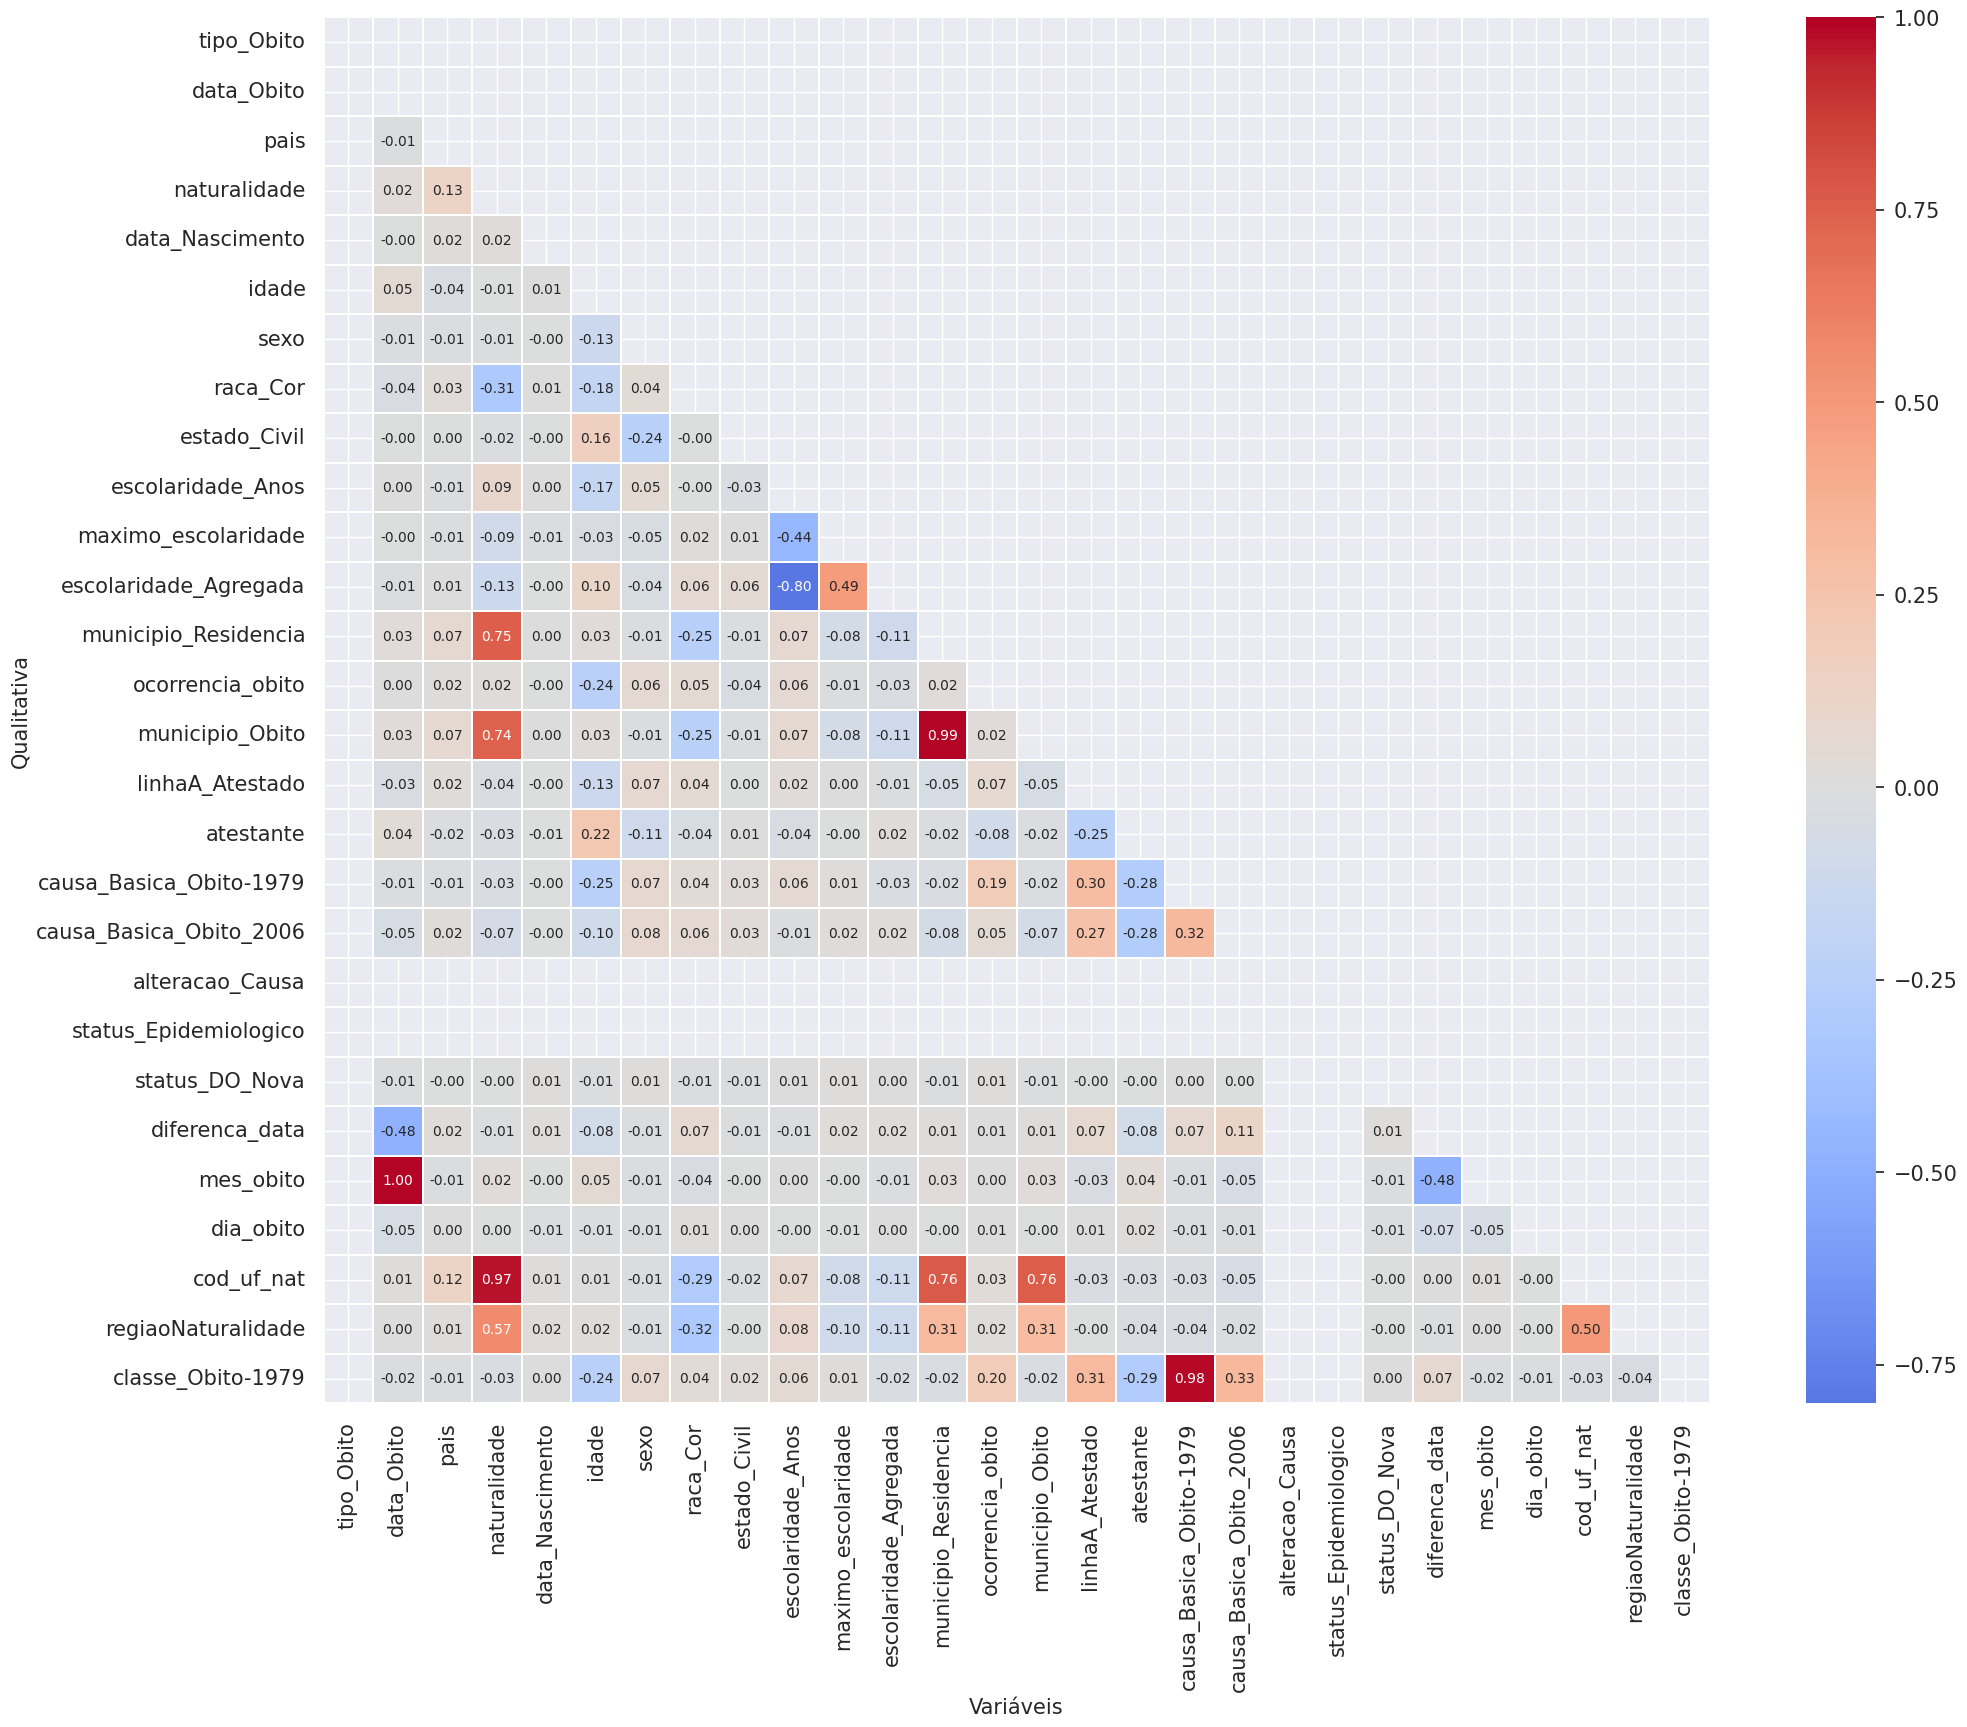

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

# Variáveis
quantitativas = ['tipo_Obito', 'data_Obito', 'pais', 'naturalidade','data_Nascimento', 'idade', 'sexo', 'raca_Cor','estado_Civil',
                 'escolaridade_Anos', 'maximo_escolaridade', 'escolaridade_Agregada', 'municipio_Residencia', 'ocorrencia_obito', 'municipio_Obito',
                 'linhaA_Atestado', 'atestante','causa_Basica_Obito-1979','causa_Basica_Obito_2006', 'alteracao_Causa',
                 'status_Epidemiologico','status_DO_Nova','diferenca_data', 'mes_obito', 'dia_obito', 'cod_uf_nat', 'regiaoNaturalidade', 'classe_Obito-1979']

# plotar o heatmap para variáveis numéricas

sns.set(font_scale=20) # font size 2

cmap = sns.diverging_palette(
    h_neg=240,
    h_pos=10,
    s=100,
    as_cmap=True,
    sep=20,

)

#cmap='coolwarm'
sns.set(rc = {'figure.figsize':(25,18)})


upp_mat = np.triu(df[quantitativas].corr())


ax = sns.heatmap(df[quantitativas].corr(), cmap='coolwarm', center=0, fmt='.2f', linewidths=0.1,
           vmax=1, square=True, linecolor='white', annot=True, annot_kws={'size': 10},  mask = upp_mat)

sns.set(font_scale=2) # font size 2

# use matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=15)

#modify individual font size of elements
plt.xlabel('Variáveis', fontsize=15);
plt.ylabel('Qualitativa', fontsize=15);
#plt.title('Sales Data', fontsize=60)
plt.tick_params(axis='both', which='major', labelsize=15)


# Saving the plot as a 'png'
plt.savefig('correlacao.png',  bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            #facecolor ="g",
            edgecolor ='w',
            orientation ='landscape')

plt.show()



In [ ]:
#Excluindo atributos com alto indice de correlação acima de 90%
df.drop(["data_Obito", "municipio_Residencia", "naturalidade"], axis=1, inplace=True)

In [ ]:
df.drop(['causa_Basica_Obito-1979'], axis=1, inplace=True)

# **Data Split**

In [ ]:
#fazendo primeiro a divisão e depois o MI
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                        stratify = y,
                                                        random_state = 100)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11641, 24)
(2911, 24)
(11641,)
(2911,)


In [ ]:
# Criano array da mutuo intormation
mi_scores= mutual_info_classif(x_train.fillna(0), y_train)

In [ ]:
mi_scores

array([7.69369823e-03, 3.55499045e-02, 6.01071343e-03, 1.35362785e-01,
       2.09857773e-02, 7.76069669e-03, 3.55537122e-02, 3.20546495e-02,
       3.70590340e-02, 2.38566664e-02, 1.04606935e-01, 1.85846145e-01,
       4.89332173e-01, 1.76816781e-01, 5.62762460e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.34131662e-03, 2.50984872e-03,
       3.49079530e-03, 4.10897583e-02, 2.08936835e-04, 2.22713989e+00])

In [ ]:
#
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [ ]:
mi_scores

classe_Obito-1979          2.227140
causa_Basica_Obito_2006    0.562762
linhaA_Atestado            0.489332
municipio_Obito            0.185846
atestante                  0.176817
idade                      0.135363
ocorrencia_obito           0.104607
cod_uf_nat                 0.041090
maximo_escolaridade        0.037059
estado_Civil               0.035554
pais                       0.035550
escolaridade_Anos          0.032055
escolaridade_Agregada      0.023857
sexo                       0.020986
raca_Cor                   0.007761
tipo_Obito                 0.007694
data_Nascimento            0.006011
dia_obito                  0.003491
diferenca_data             0.003341
mes_obito                  0.002510
regiaoNaturalidade         0.000209
status_Epidemiologico      0.000000
status_DO_Nova             0.000000
alteracao_Causa            0.000000
Name: MI Scores, dtype: float64

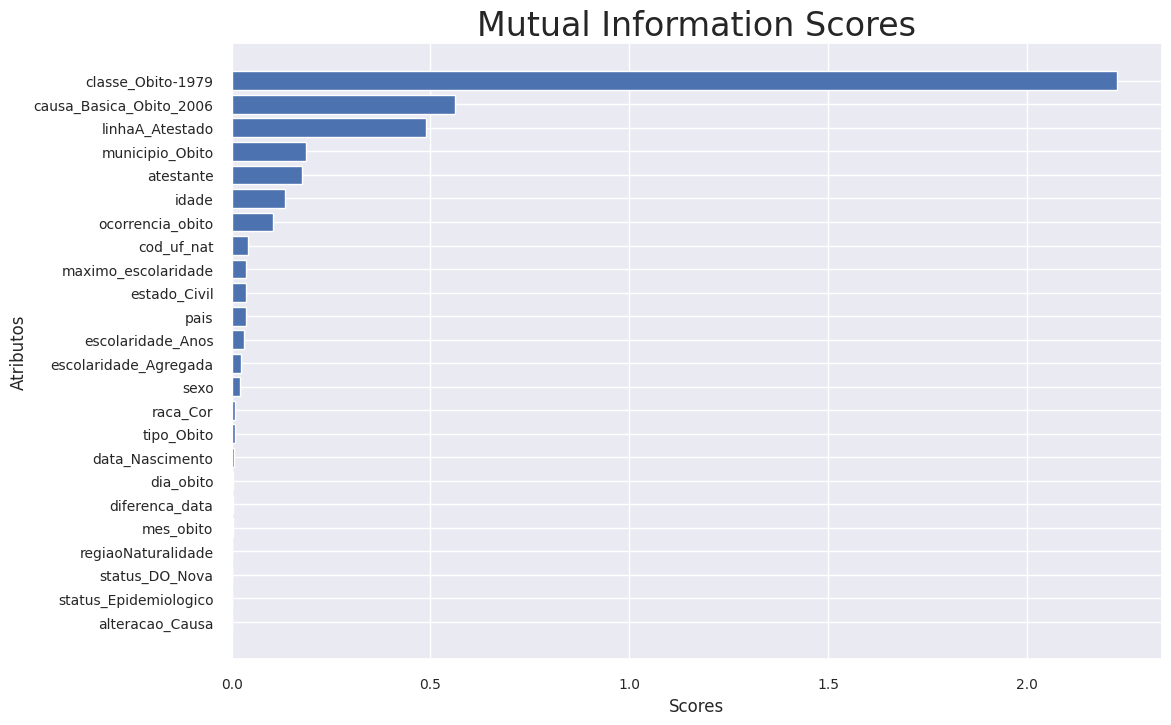

In [ ]:
#Plotando MI em um Gráfico de Barras

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)

    #modify individual font size of elements
    plt.xlabel('Scores', fontsize=12);
    plt.ylabel('Atributos', fontsize=12);
    #plt.title('Sales Data', fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(12, 8))
plot_mi_scores(mi_scores)

# Saving the plot as a 'png'
plt.savefig('BarMI_SIM.png',  bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            #facecolor ="g",
            edgecolor ='w',
            orientation ='landscape')

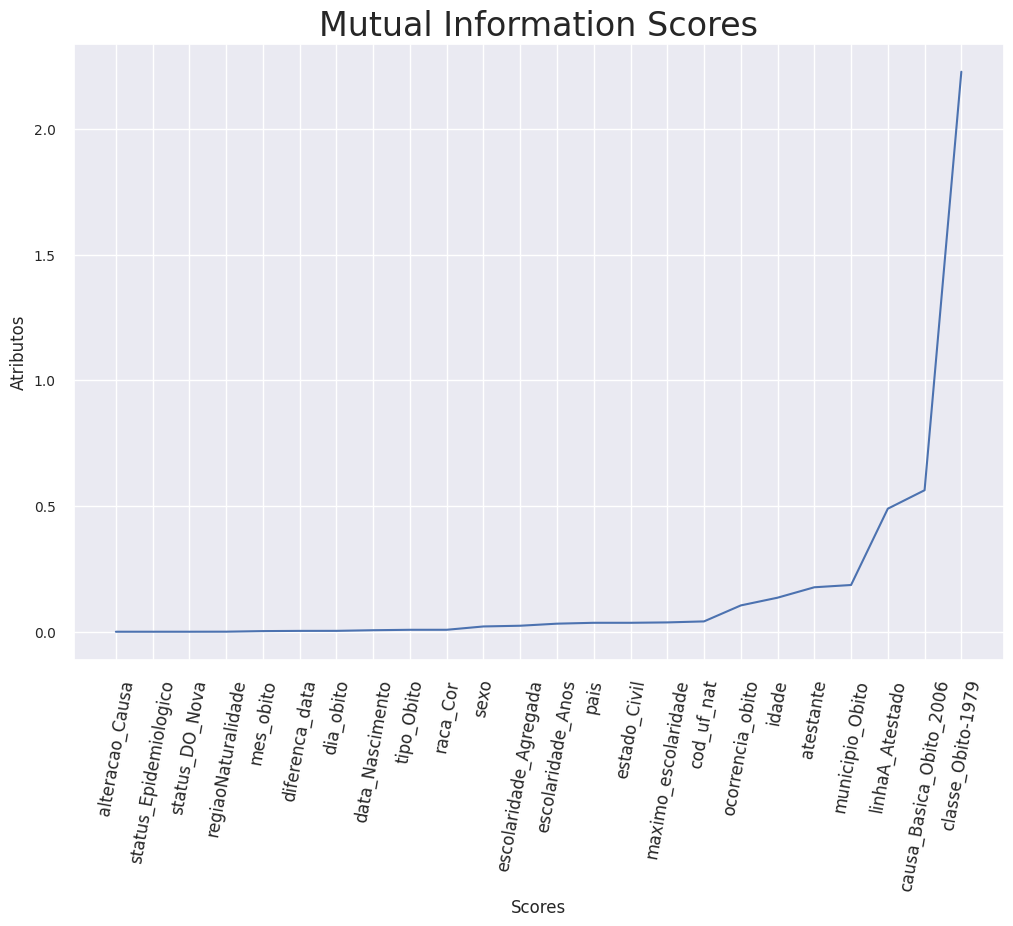

In [ ]:
#Plotando MI em um gráfico de linha

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.plot(scores)
    #plt.plot(width, scores)
    #plt.yticks(width, ticks)

    #modify individual font size of elements
    plt.xlabel('Scores', fontsize=12);
    plt.ylabel('Atributos', fontsize=12);
    #plt.title('Sales Data', fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(12, 8))
plot_mi_scores(mi_scores)
plt.xticks(rotation =80, fontsize = 12)

# Saving the plot as a 'png'
plt.savefig('MI_SIM.png',  bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            #facecolor ="g",
            edgecolor ='w',
            orientation ='landscape')

#**Normalizar SCORES em ARRAY**

In [ ]:
#NORMALIZA 1D
#https://acervolima.com/como-normalizar-uma-array-em-numpy-em-python/
# explicit function to normalize array
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

# assign array and range
Sim = mi_scores
range_to_normalize = (0, 1)
normalized_sim = normalize(Sim, range_to_normalize[0], range_to_normalize[1])
normalized_sim = pd.Series(normalized_sim, name="MI Scores Normalized", index=X.columns)
normalized_sim = normalized_sim.sort_values(ascending=False)

# display original and normalized array
#print("Original = ", Sim)
print("Normal Array = ", Sim)
print("Normalizado Array = ", (normalized_sim))


Normal Array =  classe_Obito-1979          2.227140
causa_Basica_Obito_2006    0.562762
linhaA_Atestado            0.489332
municipio_Obito            0.185846
atestante                  0.176817
idade                      0.135363
ocorrencia_obito           0.104607
cod_uf_nat                 0.041090
maximo_escolaridade        0.037059
estado_Civil               0.035554
pais                       0.035550
escolaridade_Anos          0.032055
escolaridade_Agregada      0.023857
sexo                       0.020986
raca_Cor                   0.007761
tipo_Obito                 0.007694
data_Nascimento            0.006011
dia_obito                  0.003491
diferenca_data             0.003341
mes_obito                  0.002510
regiaoNaturalidade         0.000209
status_Epidemiologico      0.000000
status_DO_Nova             0.000000
alteracao_Causa            0.000000
Name: MI Scores, dtype: float64
Normalizado Array =  tipo_Obito                 1.000000
pais                       0.25

#**Soma Acumulada**

In [ ]:
#Fazendo a soma dos dados normalizados
soma = sum(normalized_sim)

#dividindo os dados pelo total da soma
S_Norm = normalized_sim/soma

# Criando uma Series a partir de uma lista
series = pd.Series(S_Norm)

# chamando o método cumsum
cumsum = series.cumsum()

# imprimindo o resultado da chamada da função cumsum
print(cumsum)

tipo_Obito                 0.538082
pais                       0.674047
data_Nascimento            0.792271
idade                      0.837172
sexo                       0.879891
raca_Cor                   0.912595
estado_Civil               0.937868
escolaridade_Anos          0.947796
maximo_escolaridade        0.956749
escolaridade_Agregada      0.965339
ocorrencia_obito           0.973928
municipio_Obito            0.981672
linhaA_Atestado            0.987436
atestante                  0.992506
causa_Basica_Obito_2006    0.994381
alteracao_Causa            0.996240
status_Epidemiologico      0.997692
status_DO_Nova             0.998536
diferenca_data             0.999343
mes_obito                  0.999950
dia_obito                  1.000000
cod_uf_nat                 1.000000
regiaoNaturalidade         1.000000
classe_Obito-1979          1.000000
Name: MI Scores Normalized, dtype: float64


In [ ]:
labels = ['tipo_Obito', 'data_Obito', 'pais', 'naturalidade','data_Nascimento', 'idade', 'sexo', 'raca_Cor','estado_Civil',
                 'escolaridade_Anos', 'maximo_escolaridade', 'escolaridade_Agregada', 'municipio_Residencia', 'ocorrencia_obito', 'municipio_Obito',
                 'linhaA_Atestado', 'atestante','causa_Basica_Obito-1979','causa_Basica_Obito_2006', 'alteracao_Causa',
                 'status_Epidemiologico','status_DO_Nova','diferenca_data', 'mes_obito', 'dia_obito', 'cod_uf_nat', 'regiaoNaturalidade', 'classe_Obito-1979']

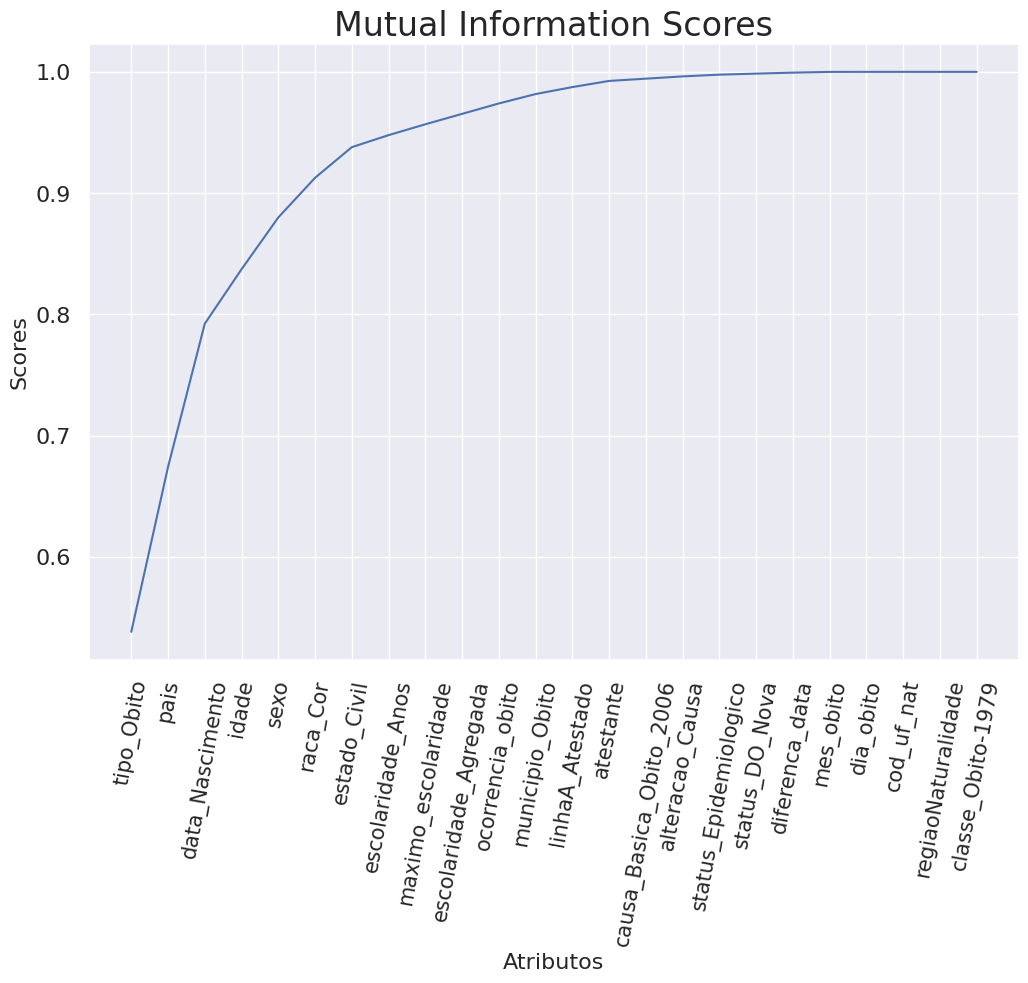

In [ ]:
#Plotando MI em um gráfico de linha


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    #plt.plot(width, scores)
    plt.plot(scores)
    #plt.yticks(width, ticks)


    #modify individual font size of elements
    plt.xlabel('Atributos', fontsize=16);
    plt.ylabel('Scores', fontsize=16);
    #plt.title('Sales Data', fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(12, 8))
plot_mi_scores(cumsum)
plt.xticks(rotation =80, fontsize = 15)

# Saving the plot as a 'png'
plt.savefig('MI_SIM_AC.png',  bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            #facecolor ="g",
            edgecolor ='w',
            orientation ='landscape')

In [ ]:
dfSimmodel = pd.DataFrame(df)

In [ ]:
dfSimmodel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14552 entries, 0 to 14551
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tipo_Obito               14552 non-null  int64  
 1   pais                     14552 non-null  int64  
 2   data_Nascimento          14552 non-null  int64  
 3   idade                    14552 non-null  int64  
 4   sexo                     14552 non-null  int64  
 5   raca_Cor                 14552 non-null  int64  
 6   estado_Civil             14552 non-null  int64  
 7   escolaridade_Anos        14552 non-null  int64  
 8   maximo_escolaridade      14552 non-null  int64  
 9   escolaridade_Agregada    14552 non-null  int64  
 10  ocorrencia_obito         14552 non-null  int64  
 11  municipio_Obito          14552 non-null  int64  
 12  linhaA_Atestado          14552 non-null  int64  
 13  atestante                14552 non-null  int64  
 14  causa_Basica_Obito_200

In [ ]:
#Importantdo biblioteca
from sklearn.model_selection import train_test_split

# Data-split: 80% treino - 20% para teste

X = dfSimmodel # matrizes - Matriz de features

#**Modelagem e Avaliação**

In [ ]:
import xgboost as xgb
import sklearn

print("XGB Version          : ", xgb.__version__)
print("Scikit-Learn Version : ", sklearn.__version__)

XGB Version          :  2.0.2
Scikit-Learn Version :  1.2.2


#**Decision tree**

In [ ]:
print(y_test.shape)
print(x_test.shape)
print(y_train.shape)
print(x_train.shape)

(2911,)
(2911, 24)
(11641,)
(11641, 24)


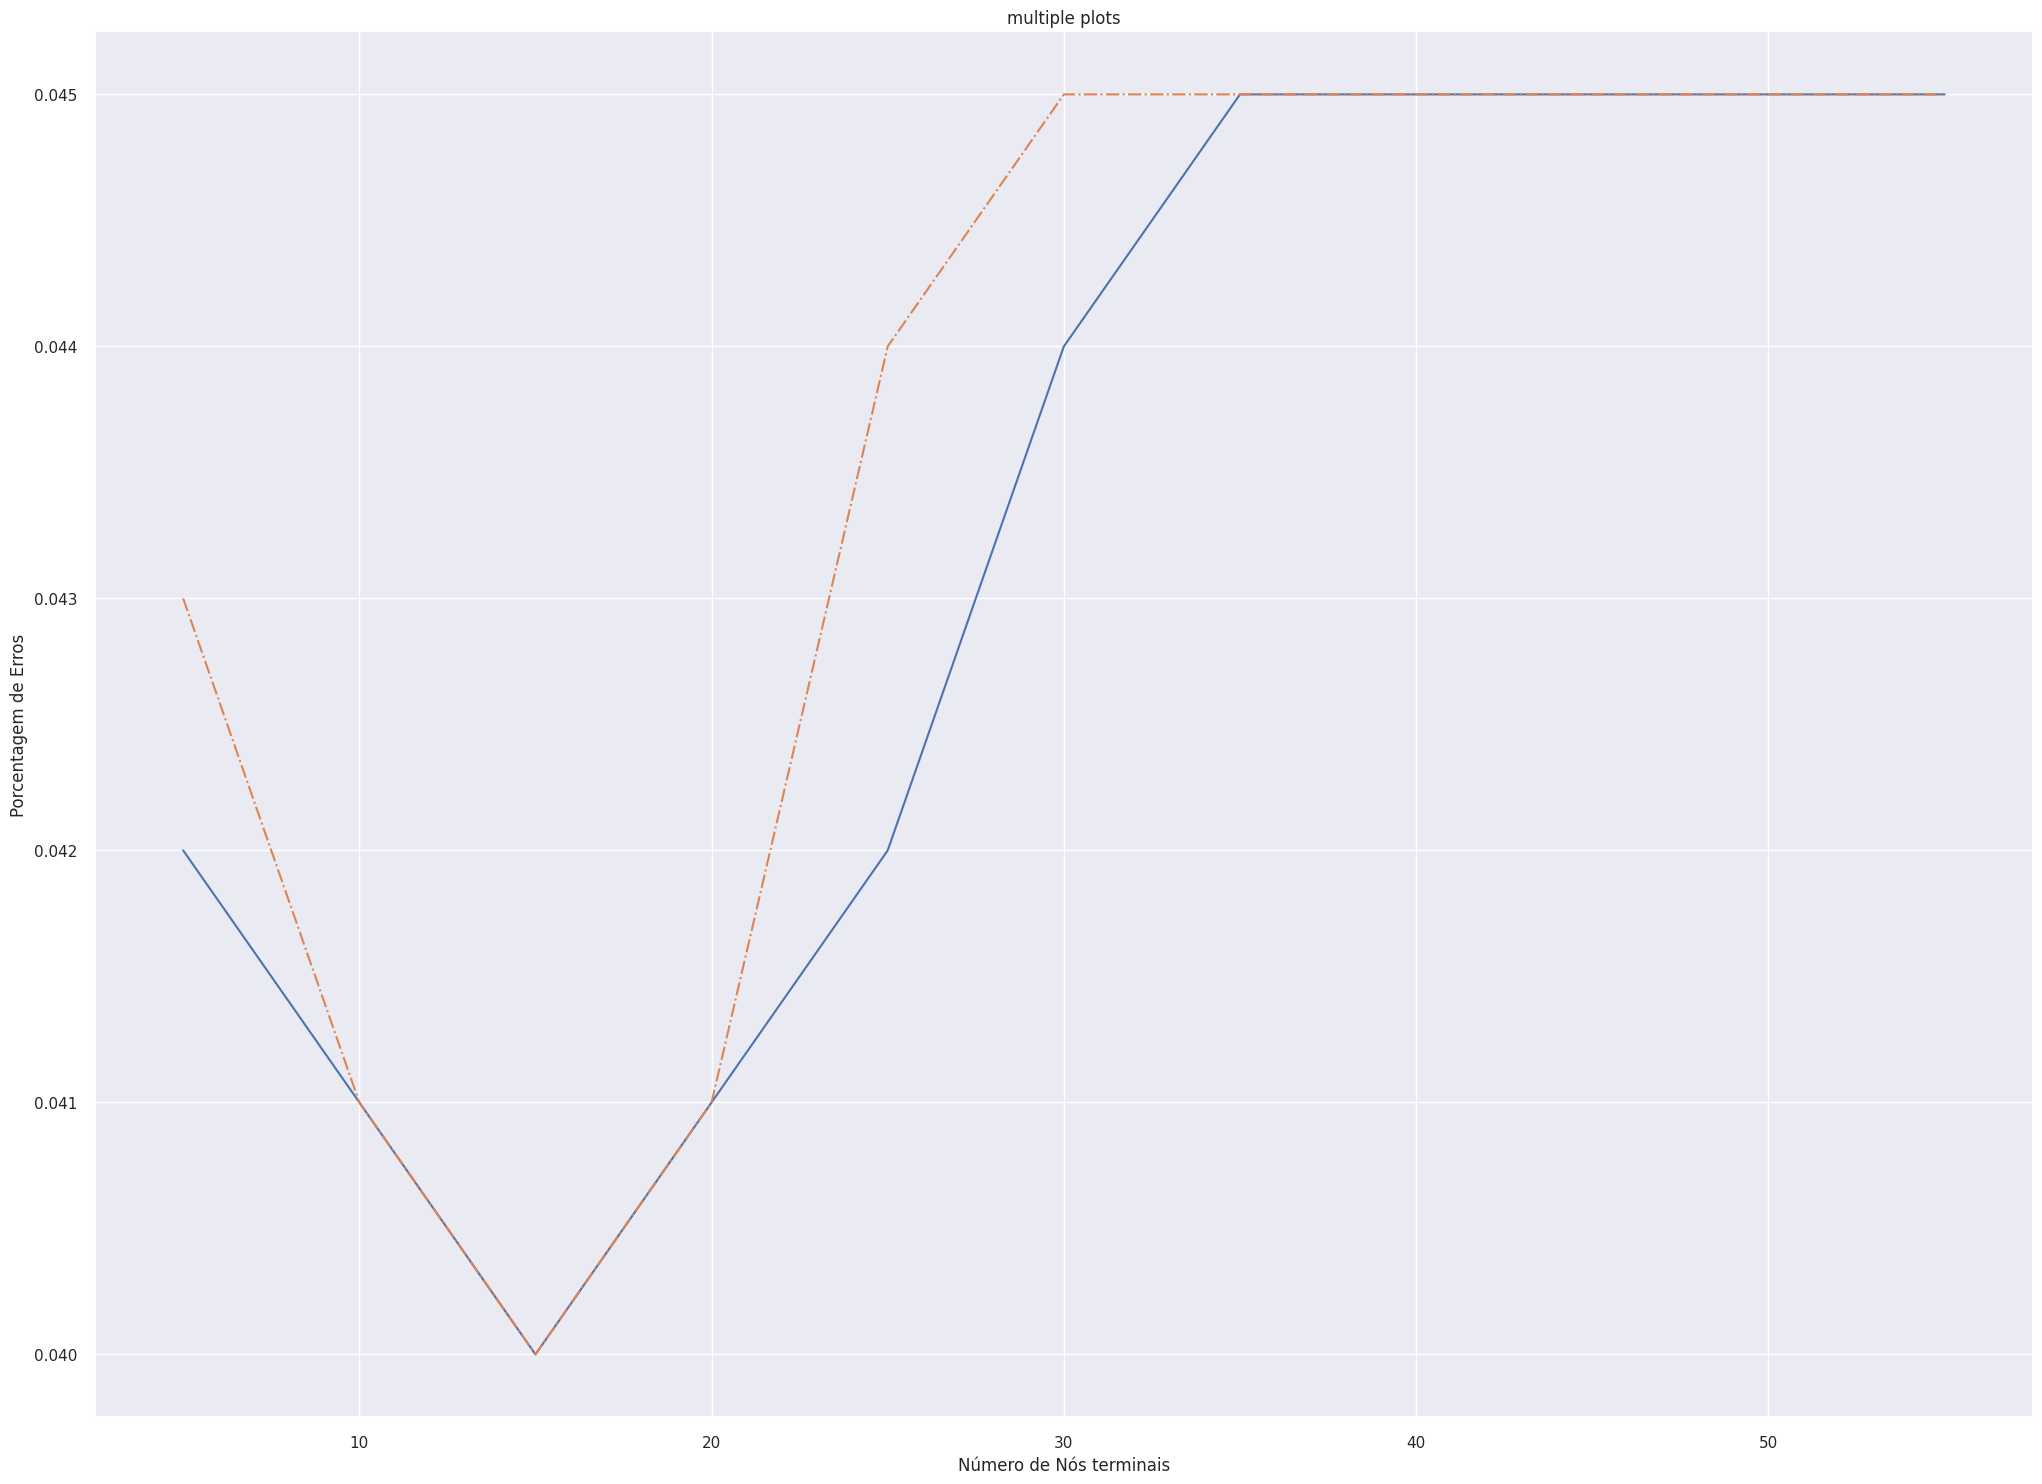

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
#y =  [4.2246, 4.1021, 3.9703, 4.0579, 4.2382, 4.3977, 4.468, 4.4991, 4.508, 4.4994, 4.512]
y =  [0.042, 0.041, 0.040, 0.041, 0.042, 0.044, 0.045, 0.045, 0.045, 0.045, 0.045]
y =  [0.042, 0.041, 0.040, 0.041, 0.042, 0.044, 0.045, 0.045, 0.045, 0.045, 0.045]
plt.plot(x, y)

x1 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
#y1 = [4.2797, 4.0511, 3.9646, 4.1475, 4.4201, 4.5054, 4.5148, 4.5063, 4.5174, 4.5124, 4.5169]
y1 = [0.043, 0.041, 0.040, 0.041, 0.044, 0.045, 0.045, 0.045, 0.045, 0.045, 0.045]
plt.plot(x1, y1, '-.')

plt.xlabel("Número de Nós terminais")
plt.ylabel("Porcentagem de Erros")
plt.title('multiple plots')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier  # Classificador
from sklearn.metrics import accuracy_score, mean_squared_error
%pylab inline

# cria uma decision tree
clf_tree = DecisionTreeClassifier(max_depth=55, criterion='gini')

# treinamento do modelo
clf_tree.fit(x_train,y_train)

# predição
y_pred = clf_tree.predict(x_test)

error1=np.sqrt(mean_squared_error(y_test, y_pred))

# acurácia
acc_DT1 = accuracy_score(y_test,y_pred)

print('accuracy_score:{:.2f}% e '.format(acc_DT1*100),error1)

Populating the interactive namespace from numpy and matplotlib
accuracy_score:100.00% e  0.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier  # Classificador
from sklearn.metrics import accuracy_score, mean_squared_error
%pylab inline

# cria uma decision tree
clf_tree25 = DecisionTreeClassifier(max_depth=25, criterion='gini')

# treinamento do modelo
clf_tree25.fit(x_train,y_train)

# predição
y_pred25 = clf_tree25.predict(x_test)

error=np.sqrt(mean_squared_error(y_test, y_pred25))

# acurácia
acc_DT1 = accuracy_score(y_test,y_pred25)

print('accuracy_score:{:.2f}% e '.format(acc_DT1*100),error)


Populating the interactive namespace from numpy and matplotlib
accuracy_score:100.00% e  0.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [ ]:
#Calculando o f1
from sklearn.metrics import f1_score
import numpy as np

f1_values = [f1_score(y_test, clf_tree25.predict(x_test), average='macro')]
f1_values

f1_values1 = [f1_score(y_test, clf_tree25.predict(x_test), average='micro')]
f1_values1

f1_values2 = [f1_score(y_test, clf_tree25.predict(x_test), average='weighted')]
f1_values2

print(f1_values)
print(f1_values1)
print(f1_values2)

[1.0]
[1.0]
[1.0]


In [ ]:
from sklearn.metrics import balanced_accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

print('Balanced accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred25)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred25, average = 'micro')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred25, average = 'micro')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred25, average = 'micro')))

Balanced accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00


In [ ]:
# Confusion matrix no conjunto de validação
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import auc

y_predtree = clf_tree25.predict(x_test)


metricas = pd.DataFrame({'Metrica': ['Acurácia', 'Precision', 'Recall','f1-Score'],
                        'Valor_Tree': [accuracy_score(y_test, y_predtree)*100,
                                  precision_score(y_test, y_predtree, average='micro')*100,
                                  recall_score(y_test, y_predtree, average='micro')*100,
                                  f1_score(y_test, y_predtree, average='micro')*100]})
metricas

,Metrica,Valor_Tree
0,Acurácia,100.0
1,Precision,100.0
2,Recall,100.0
3,f1-Score,100.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier  # Classificador
from sklearn.metrics import accuracy_score, mean_squared_error
%pylab inline

# cria uma decision tree
clf_tree15 = DecisionTreeClassifier(max_depth=15, criterion='gini')

# treinamento do modelo
clf_tree15.fit(x_train,y_train)

# predição
y_pred15 = clf_tree15.predict(x_test)

error15=np.sqrt(mean_squared_error(y_test, y_pred15))

# acurácia
acc_DT1 = accuracy_score(y_test,y_pred15)

print('accuracy_score:{:.2f}% e '.format(acc_DT1*100),error15)


Populating the interactive namespace from numpy and matplotlib
accuracy_score:99.97% e  0.018534415610053194


In [ ]:
#Calculando o f1
from sklearn.metrics import f1_score
import numpy as np

f1_values = [f1_score(y_test, clf_tree15.predict(x_test), average='macro')]
f1_values

f1_values1 = [f1_score(y_test, clf_tree15.predict(x_test), average='micro')]
f1_values1

f1_values2 = [f1_score(y_test, clf_tree15.predict(x_test), average='weighted')]
f1_values2

print(f1_values)
print(f1_values1)
print(f1_values2)

[0.8947368421052632]
[0.9996564754379939]
[0.9996564754379939]


In [ ]:
from sklearn.metrics import balanced_accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

print('Balanced accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred15)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred15, average = 'micro')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred15, average = 'micro')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred15, average = 'micro')))

Balanced accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00


In [ ]:
# Confusion matrix no conjunto de validação
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import auc

y_predtree = clf_tree15.predict(x_test)


metricas = pd.DataFrame({'Metrica': ['Acurácia', 'Precision', 'Recall','f1-Score'],
                        'Valor_Tree': [accuracy_score(y_test, y_predtree)*100,
                                  precision_score(y_test, y_predtree, average='micro')*100,
                                  recall_score(y_test, y_predtree, average='micro')*100,
                                  f1_score(y_test, y_predtree, average='micro')*100]})
metricas

,Metrica,Valor_Tree
0,Acurácia,99.965648
1,Precision,99.965648
2,Recall,99.965648
3,f1-Score,99.965648


In [ ]:
from sklearn.tree import DecisionTreeClassifier  # Classificador
from sklearn.metrics import accuracy_score, mean_squared_error
%pylab inline

# cria uma decision tree
clf_tree5 = DecisionTreeClassifier(max_depth=3, criterion='gini')

# treinamento do modelo
clf_tree5.fit(x_train,y_train)

# predição
y_pred5 = clf_tree5.predict(x_test)

error5=np.sqrt(mean_squared_error(y_test, y_pred5))

# acurácia
acc_DT1 = accuracy_score(y_test,y_pred5)

print('accuracy_score:{:.2f}% e '.format(acc_DT1*100),error5)


Populating the interactive namespace from numpy and matplotlib
accuracy_score:71.90% e  1.410930486177768


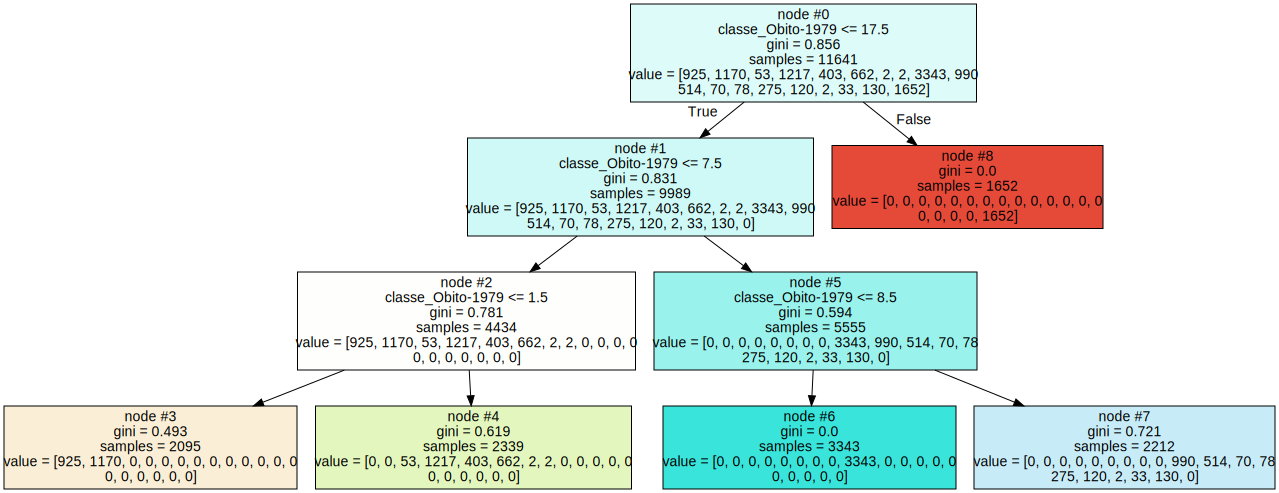

<Figure size 2500x1800 with 0 Axes>

In [ ]:
#Imprimindo a Tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import export_graphviz, plot_tree
import graphviz
import pydot

dot_data = export_graphviz(
        clf_tree5,
        out_file = None,
        feature_names = x_train.columns,
        filled = True,
        node_ids = True,
        rotate = False,
        label = "all",
        proportion=False,
        special_characters=False )

graph = graphviz.Source(dot_data)


# Saving the plot as a 'png'
plt.savefig('treeexample.png', bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            edgecolor ='w',
            orientation ='landscape')

graph

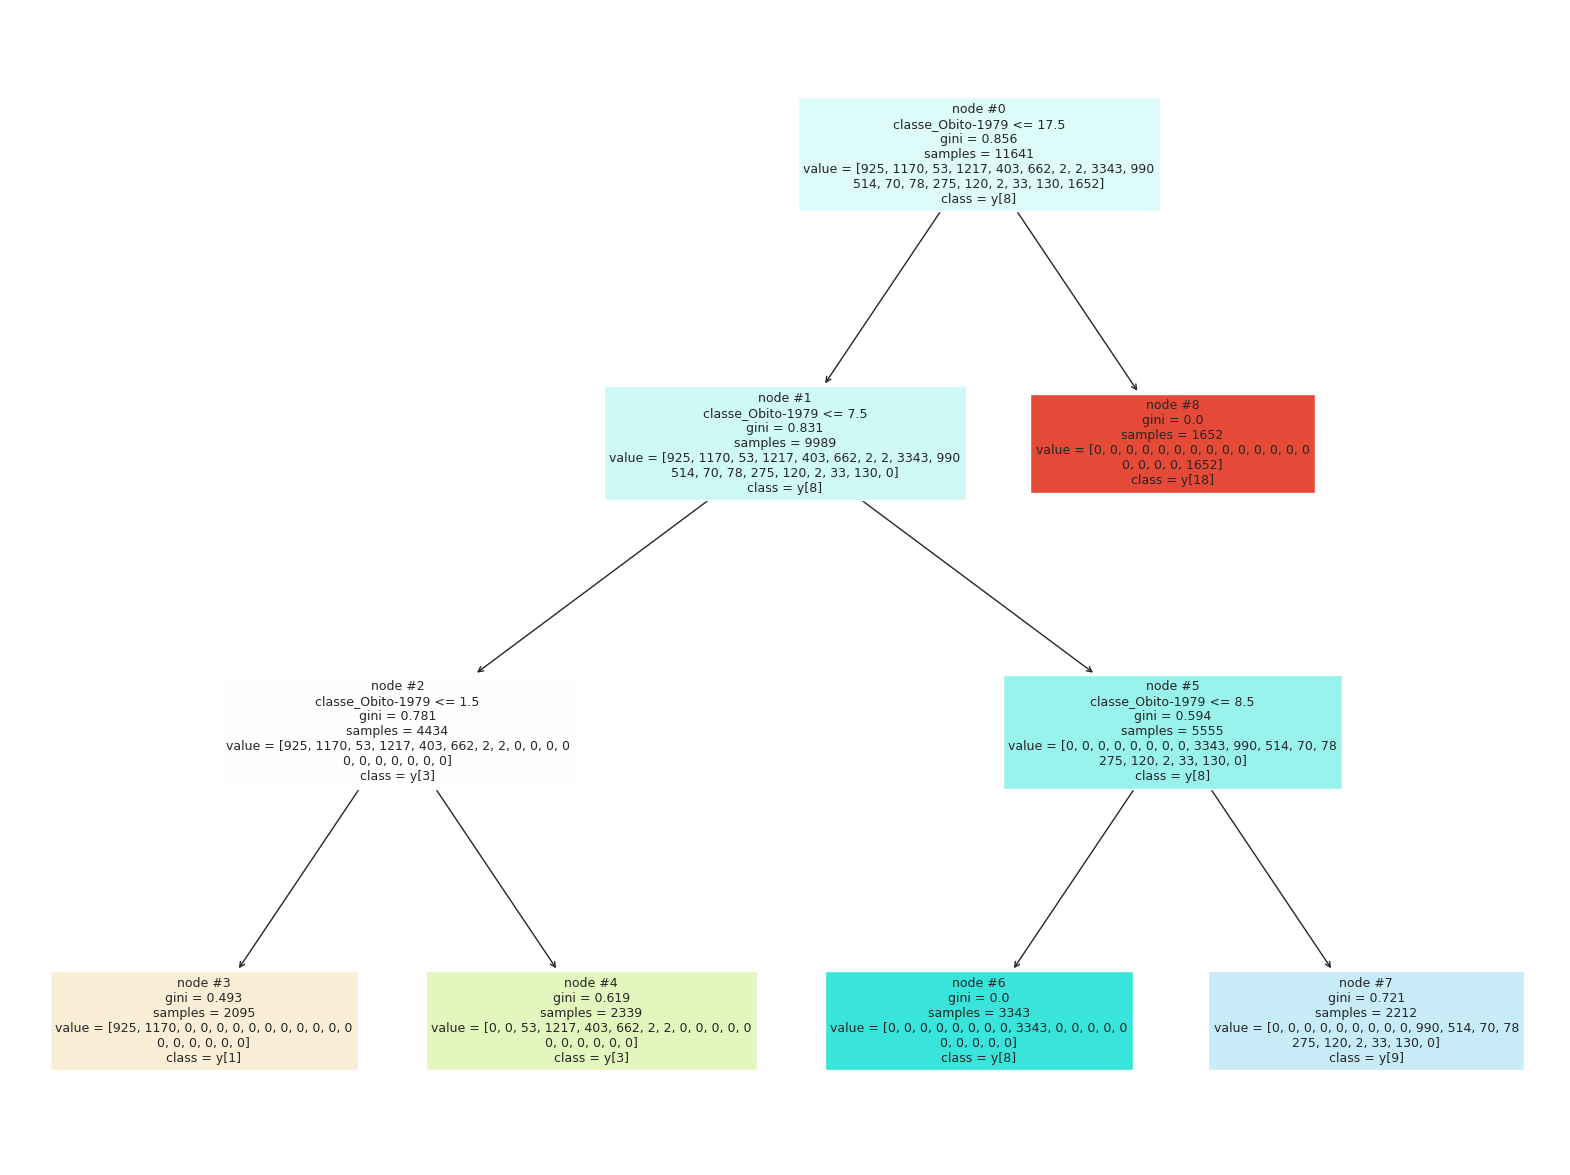

In [ ]:
feature_names = list(x_train.columns)

plt.figure(figsize=(20, 15))
tree.plot_tree(clf_tree5, feature_names=feature_names, filled=True,
            fontsize=9, node_ids=True, class_names=True, label = "all");

            # Saving the plot as a 'png'
plt.savefig('treeexample.png', bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            edgecolor ='w',
            orientation ='landscape')

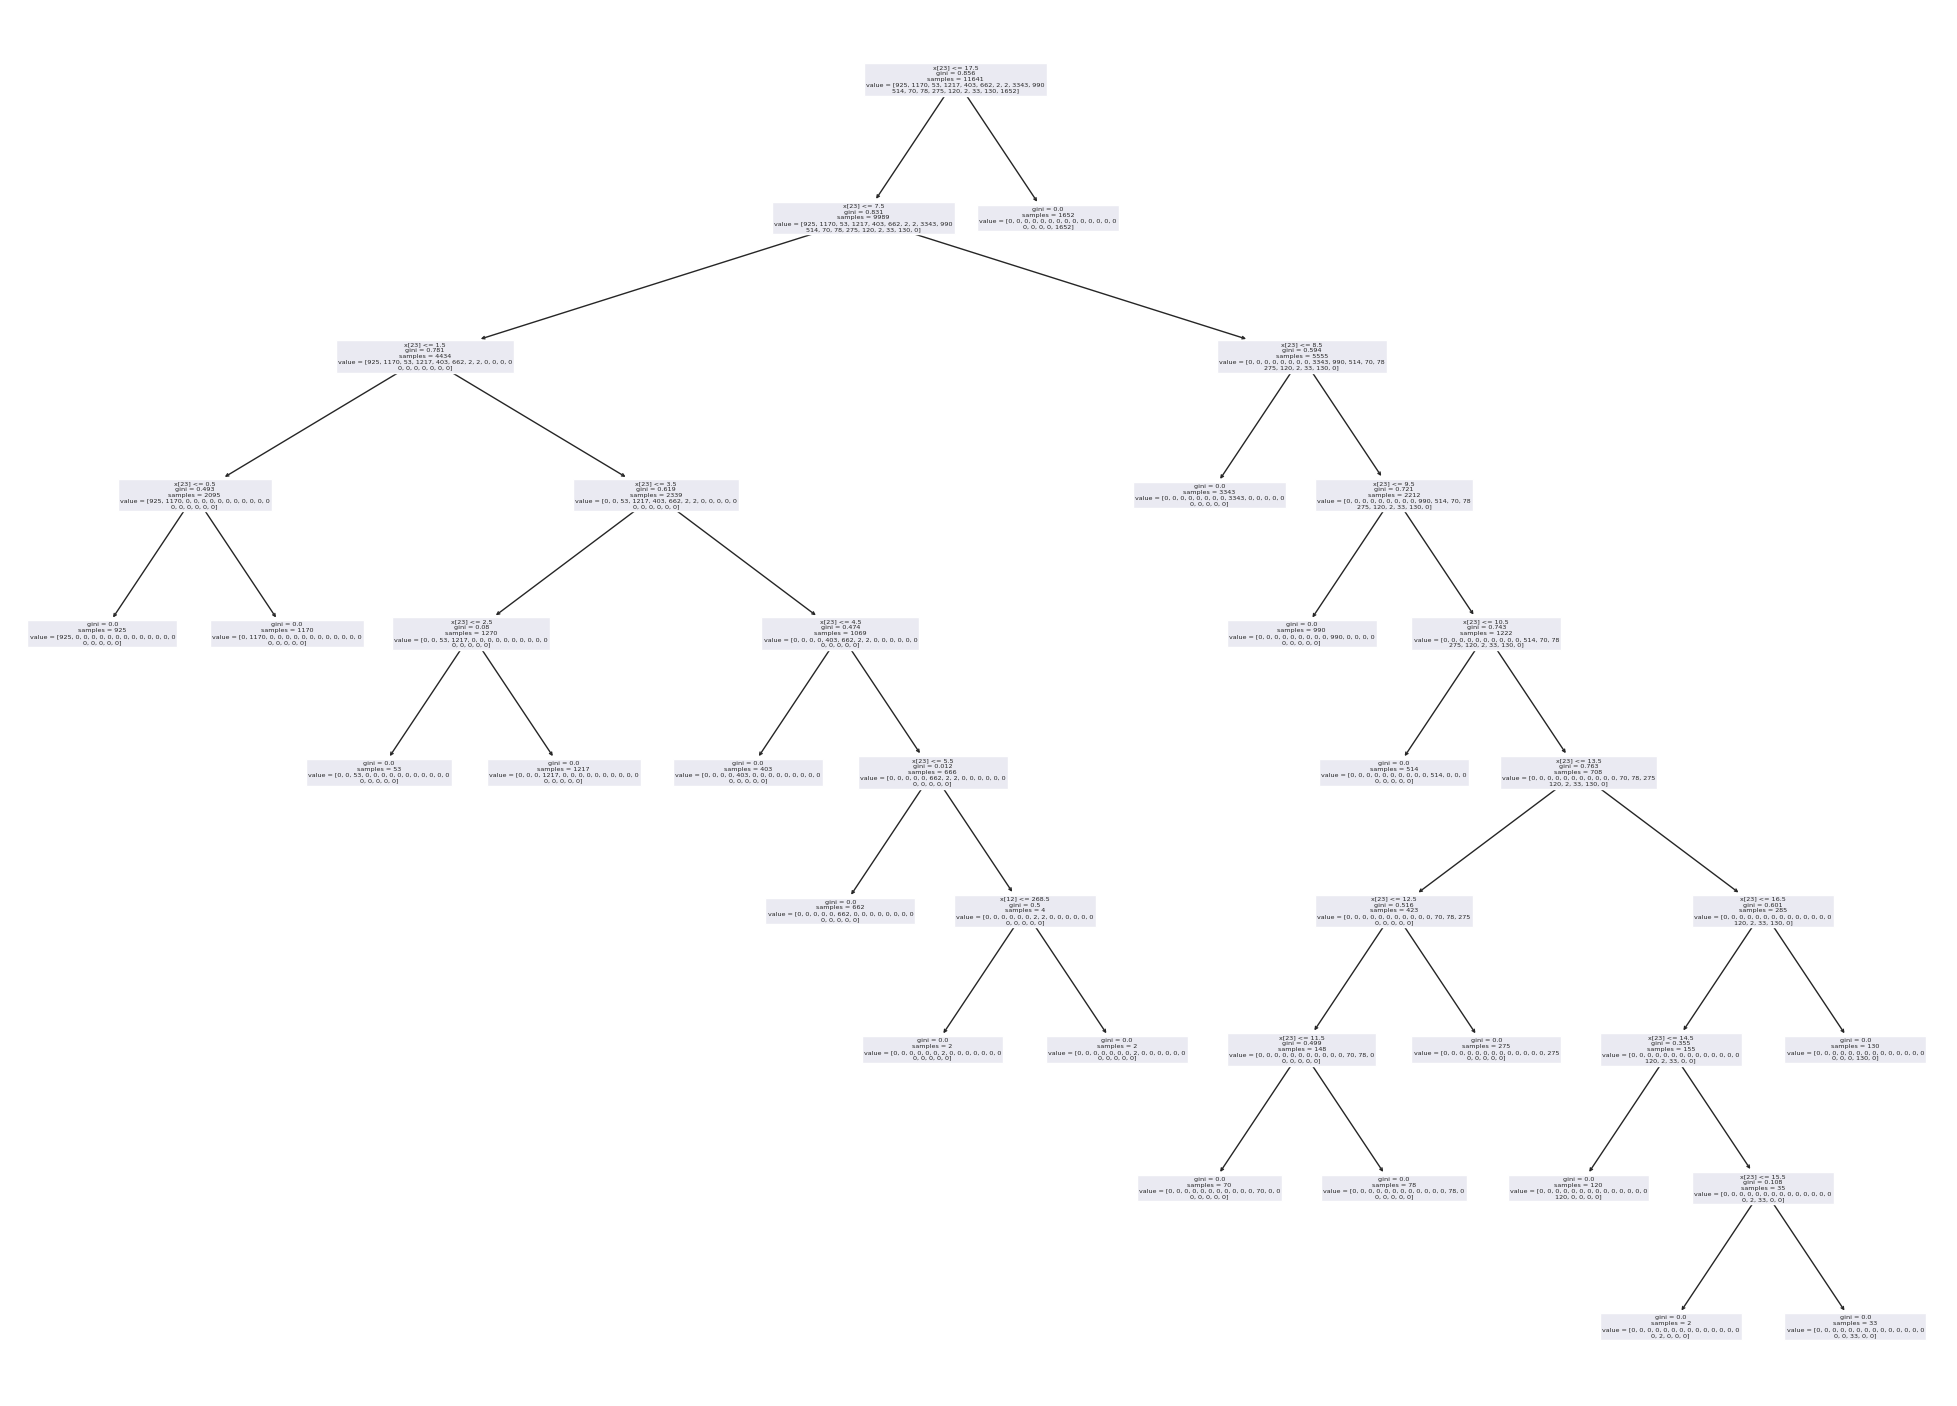

<Figure size 7500x5400 with 0 Axes>

In [ ]:
tree.plot_tree(clf_tree15)
plt.figure( figsize=(25,18),dpi=300)

plt.show()

#**Naive Bayes**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Cria um NB-gaussiano
clf_NB = GaussianNB()

# treinamento
clf_NB.fit(x_train,y_train)

# predição
y_predNB = clf_NB.predict(x_test)

# acurácia e error
acc_NB = accuracy_score(y_test,y_predNB)
error=np.sqrt(mean_squared_error(y_test, y_predNB))

print('accuracy_score:{:.2f}% e '.format(acc_NB*100), error)

accuracy_score:56.78% e  1.7383859099660224


In [ ]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test,y_predNB))

              precision    recall  f1-score   support

           0       0.64      0.27      0.38       231
           1       0.46      0.49      0.48       293
           2       0.00      0.00      0.00        13
           3       0.50      0.64      0.56       304
           4       0.44      0.34      0.38       101
           5       0.55      0.04      0.07       165
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.59      0.93      0.72       836
           9       0.36      0.17      0.23       247
          10       0.20      0.02      0.03       128
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00        20
          13       0.37      0.14      0.21        69
          14       0.52      0.37      0.43        30
          15       0.00      0.00      0.00         1
          16       0.19      0.62      0.29         8
          17       0.27    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test,y_pred))

[[231   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 293   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 304   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 101   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 165   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 836   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 247   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 128   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  20   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  69   0   0   0   0   0]
 [  0   0   0   0   0   0

In [ ]:
acc_NB*100

56.78461009962212

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


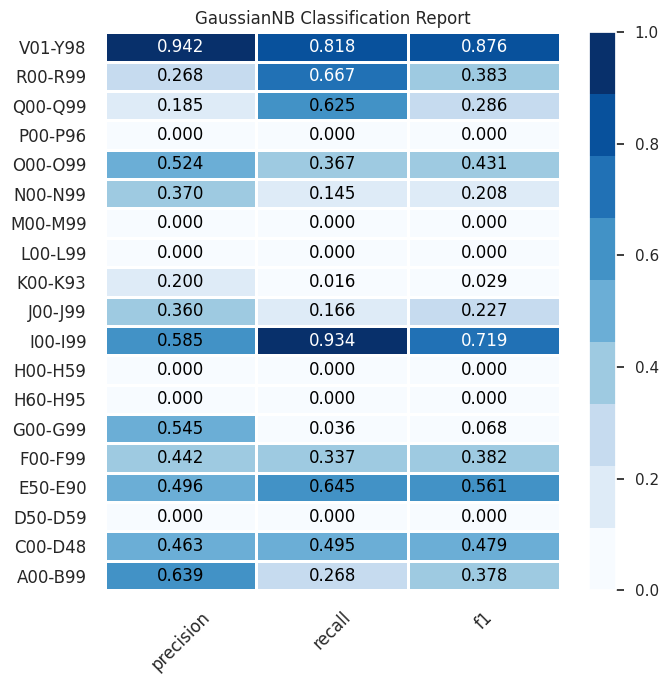

In [ ]:
#25
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

# Variáveis
quantitativas = ["A00-B99", "C00-D48", "D50-D59","E50-E90","F00-F99",
                "G00-G99", "H60-H95", "H00-H59", "I00-I99","J00-J99",
                "K00-K93","L00-L99","M00-M99","N00-N99","O00-O99",
                "P00-P96","Q00-Q99","R00-R99","V01-Y98"]



fig, ax = plt.subplots(figsize = (7, 7))

cm_viz = ClassificationReport(
    clf_NB,
    classes = quantitativas,
    label_encoder = quantitativas,
    decending = False,
    cmap = 'Blues'

)

cm_viz.score(x_test, y_test)
cm_viz.poof()

fig.savefig('RelatorioClassificaoGBM.png', dpi = 300)

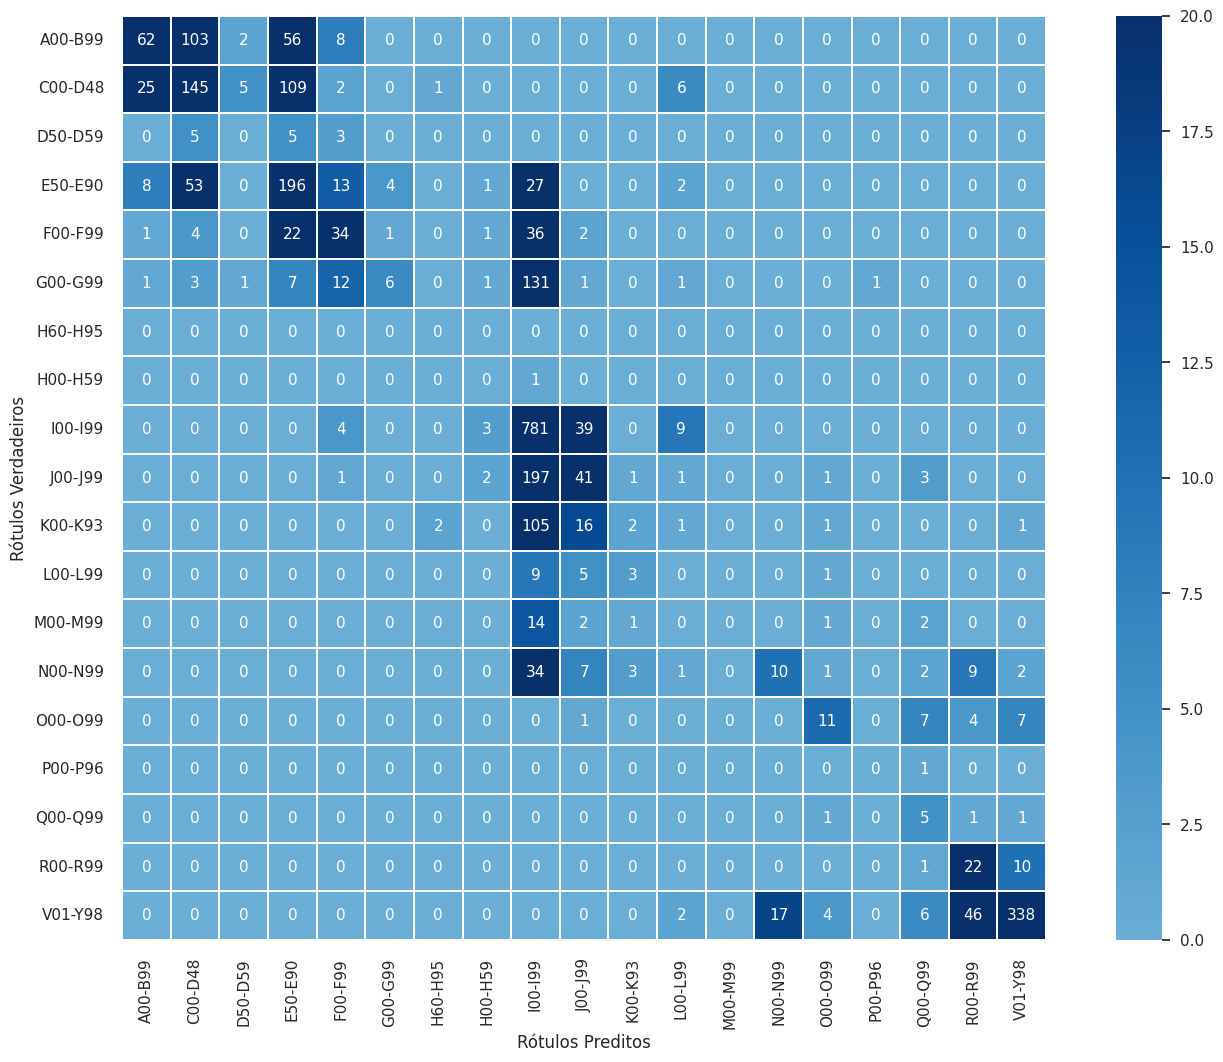

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (18,12))
target_names = ["A00-B99", "C00-D48", "D50-D59","E50-E90","F00-F99",
                "G00-G99", "H60-H95", "H00-H59", "I00-I99","J00-J99",
                "K00-K93","L00-L99","M00-M99","N00-N99","O00-O99",
                "P00-P96","Q00-Q99","R00-R99","V01-Y98"]

sns.heatmap(confusion_matrix(y_test, y_predNB), xticklabels = target_names,
            yticklabels = target_names, cmap = 'Blues', fmt="d", center=0,
             linewidths=0.1, vmax=20, square=True,
            linecolor='white', annot=True, annot_kws={'size': 11})

plt.xlabel('Rótulos Preditos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()

In [ ]:
#Calculando o f1

from sklearn.metrics import f1_score
import numpy as np

f1_values = [f1_score(y_test, clf_NB.predict(x_test), average='macro')]
f1_values

f1_values1 = [f1_score(y_test, clf_NB.predict(x_test), average='micro')]
f1_values1

f1_values2 = [f1_score(y_test, clf_NB.predict(x_test), average='weighted')]
f1_values2
print(f1_values)
print(f1_values1)
print(f1_values2)

[0.26457342275405277]
[0.5678461009962212]
[0.5197650962061771]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('Balanced accuracy: {:.2f}'.format(accuracy_score(y_test, y_predNB)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predNB, average = 'micro')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predNB, average = 'micro')))
print('F1: {:.2f}'.format(f1_score(y_test, y_predNB, average = 'micro')))

Balanced accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00


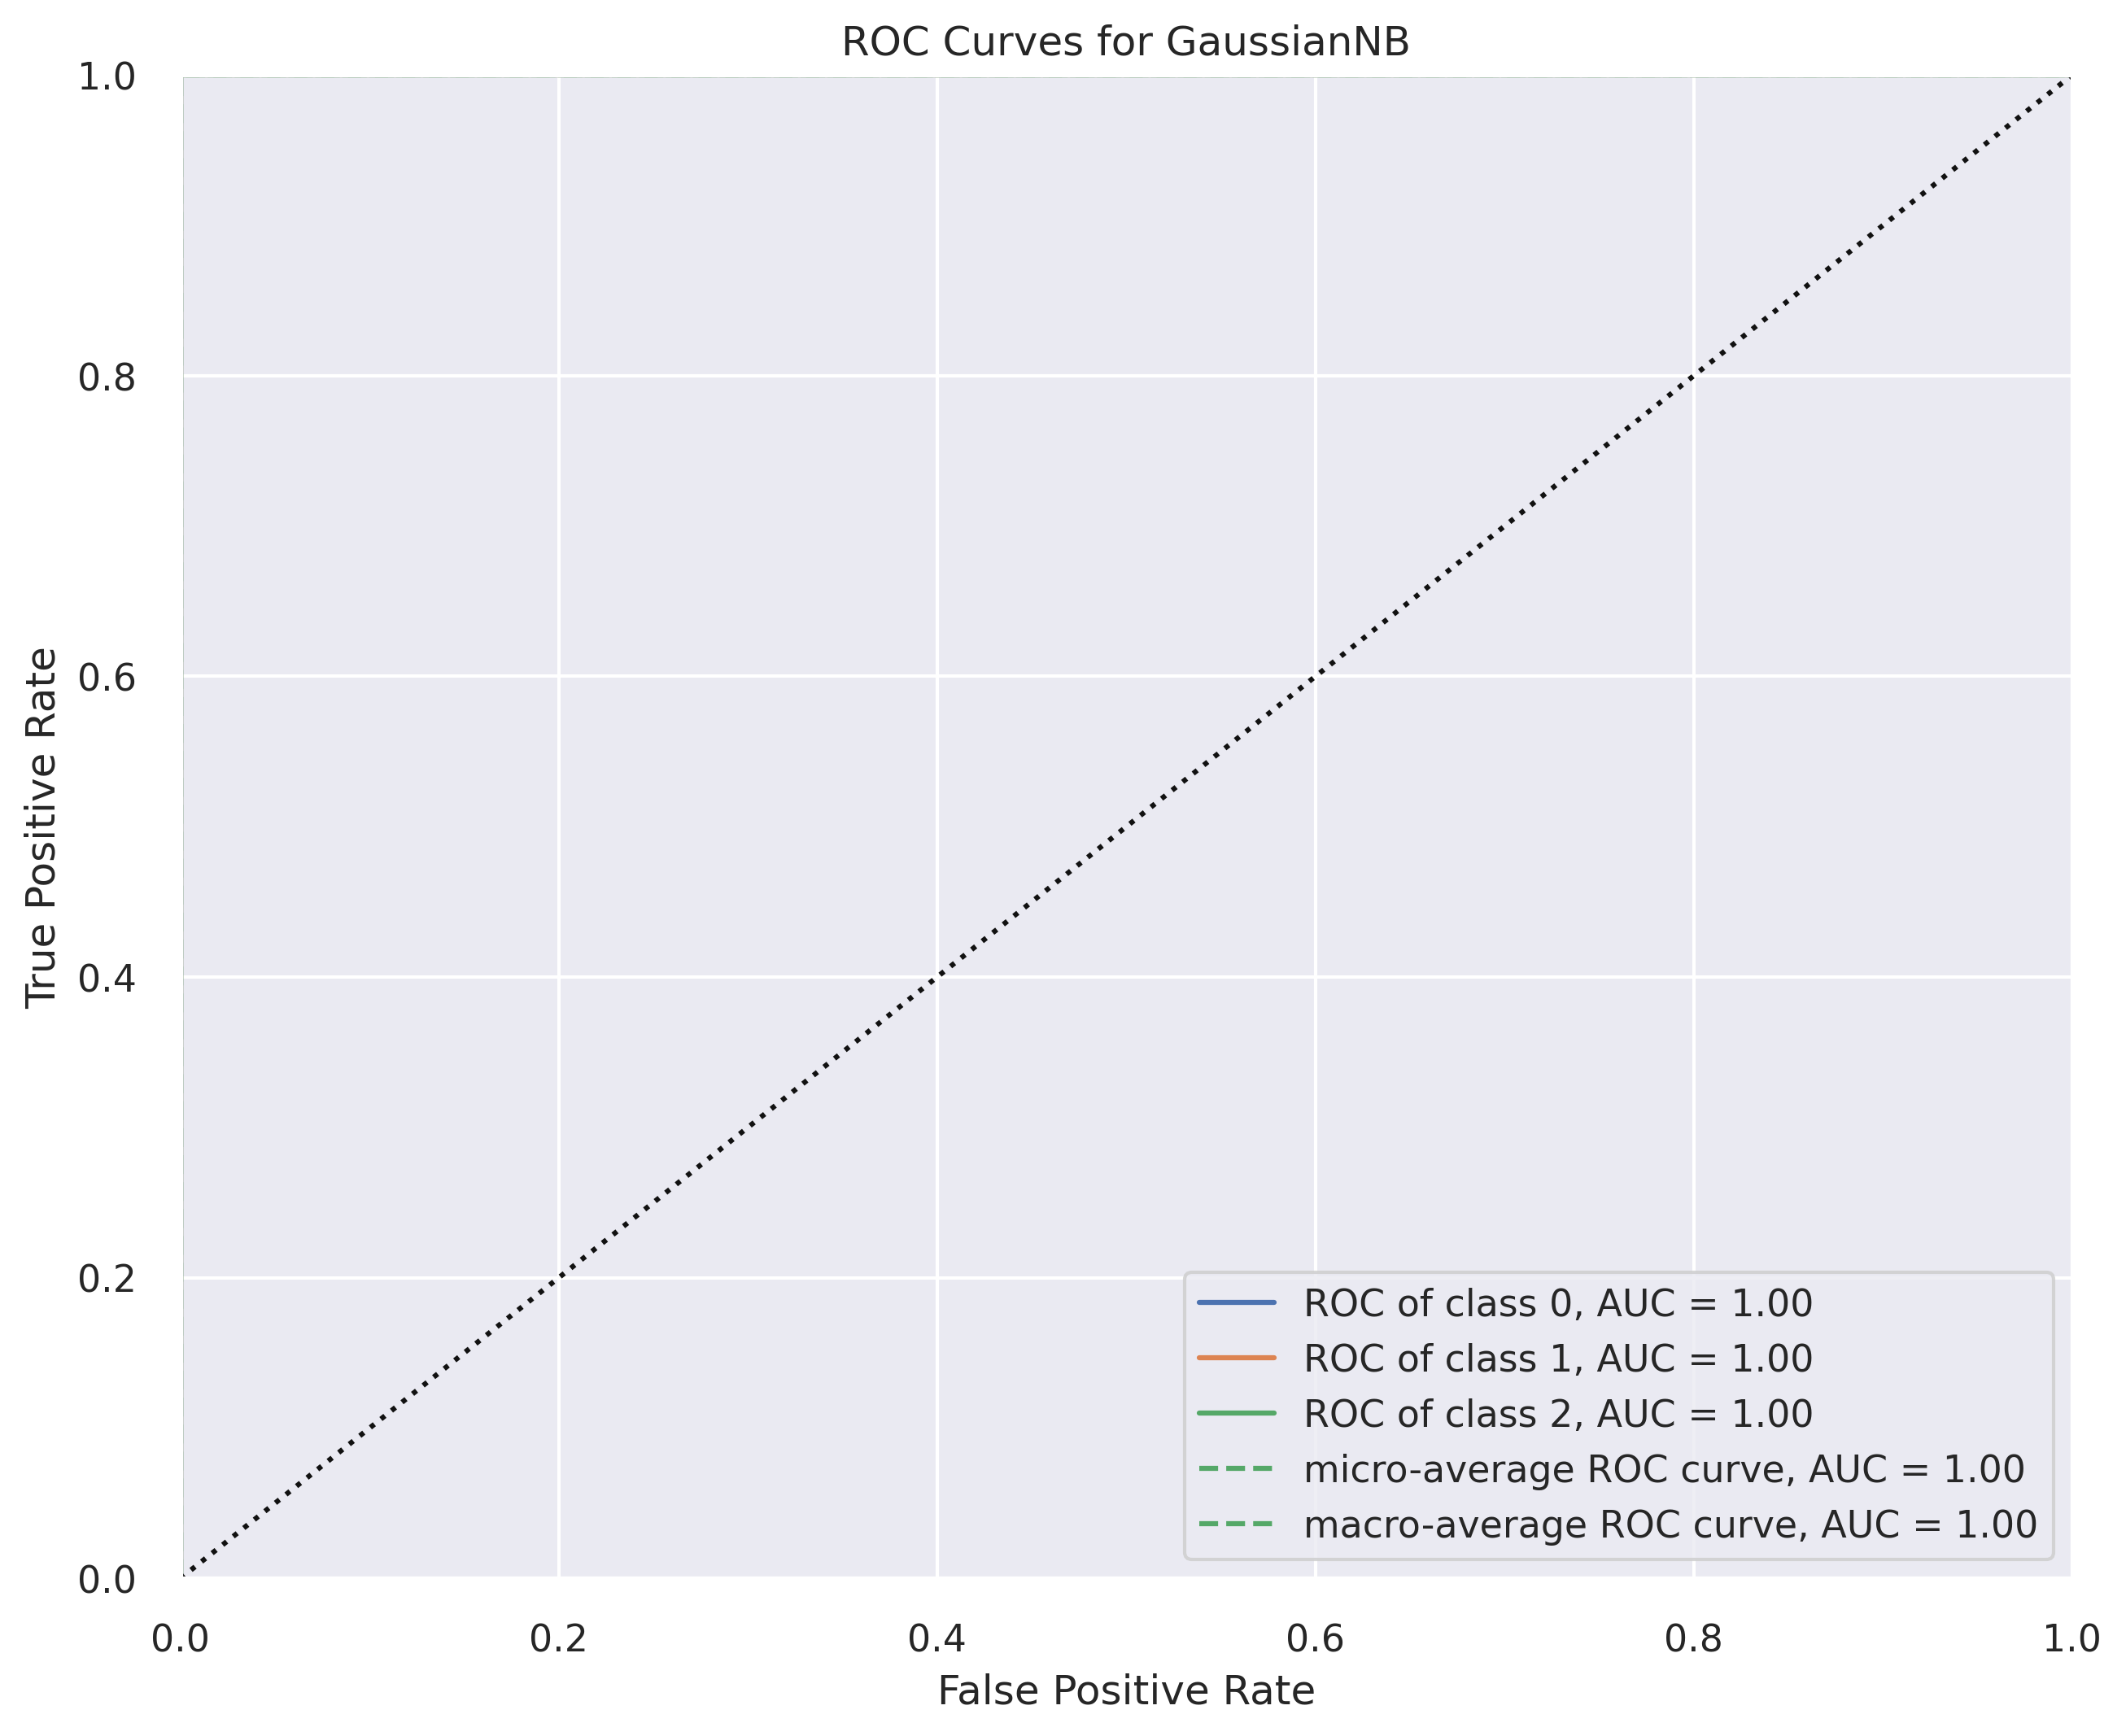

<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
# Fit model
from yellowbrick.classifier import ROCAUC
from yellowbrick.contrib.wrapper import wrap
from sklearn.base import BaseEstimator

model_NB = clf_NB.fit(x_train, y_train)

plt.figure( figsize=(10,8),dpi=300)


model = wrap(model_NB)
visualizer = ROCAUC(model)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [ ]:
#from sklearn.metrics import f1_score


#print(f1_score(y_test, mod_xgb_cv.best_estimator_.predict(x_test)))
#print(f1_score(y_test, mod_logistic_cv.best_estimator_.predict(x_test)))
#f1_score(y_test, mod_svc.best_estimator_.predict(PCA_val))
#print(f1_score(y_test, mod_randForest_cv.best_estimator_.predict(x_test)))
#print(f1_score(y_test, lgb_model.best_estimator_.predict(x_test)))
#print(f1_score(y_test, clf_grid.best_estimator_.predict(x_test)))
#print(f1_score(y_test, clf.predict(x_test)))


In [ ]:
#DA - accuracy_score:100.00% e  0.003376500198402524
errorAD = 0.00338
#errorRF =
errorGBM = 0.76674
errorcat = 1.8485
#errorxg =
errorNB =0.28177

#acurácia
acc_DT = 99.99885992464101
acc_CAT = 0.9828132659924983
acc_GBM = 98.47400913200363
#acc_XG =
acc_NB = 97.78711372821743

#acc_XG*100, acc_RF*100

compare = pd.DataFrame({'Model': ['Decision Tree',  'Light GBM', 'CAT Boost',  'Naive bayes'],
                        'Accuracy': [acc_DT,  acc_GBM, acc_CAT,  acc_NB],
                        'Error': [errorAD, errorGBM, errorcat, errorNB]})
compare

,Model,Accuracy,Error
0,Decision Tree,99.998860,0.00338
1,Light GBM,98.474009,0.76674
2,CAT Boost,0.982813,1.84850
3,Naive bayes,97.787114,0.28177


#**Random forest**

In [ ]:
## Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold


mod_randForest = RandomForestClassifier(random_state=1234)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

mod_randForest_cv = GridSearchCV(estimator=mod_randForest,
                                 param_grid=param_grid,
                                 cv= Skfold,
                                 n_jobs=-1,
                                 scoring='f1')

mod_randForest_cv.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [ ]:
mod_randForest_cv.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
rfc1=RandomForestClassifier(random_state=42,
                            max_features='log2',
                            n_estimators= 500,
                            max_depth=8,
                            criterion='gini')

In [ ]:
y_pred = mod_randForest_cv.predict(x_test)

# acurácia
acc_RF=accuracy_score(y_test,y_pred)

error=np.sqrt(mean_squared_error(y_test, y_pred))

print('accuracy_score:{:.2f}% e'.format(acc_RF*100), error)

accuracy_score:100.00% e 0.0


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

f1_values = [f1_score(y_test, mod_randForest_cv.best_estimator_.predict(x_test), average='macro')]
f1_values

f1_values1 = [f1_score(y_test, mod_randForest_cv.best_estimator_.predict(x_test), average='micro')]
f1_values1

f1_values2 = [f1_score(y_test, mod_randForest_cv.best_estimator_.predict(x_test), average='weighted')]
f1_values2

print(f1_values)
print(f1_values1)
print(f1_values2)

[1.0]
[1.0]
[1.0]


In [ ]:
print(f1_values)
print(f1_values1)
print(f1_values2)

[1.0]
[1.0]
[1.0]


In [ ]:
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd

# Converta x_test para DataFrame, se necessário
x_test_df = pd.DataFrame(x_test)

f1_values = [f1_score(y_test, mod_randForest_cv.best_estimator_.predict(x_test_df), average='micro')]

for var in x_test_df.columns:
    X_permu = x_test_df.copy()
    X_permu[var] = np.random.permutation(x_test_df[var])

    y_pred = mod_randForest_cv.best_estimator_.predict(X_permu)
    f1_values.append(round(f1_score(y_test, y_pred, average='micro'), 4))

print(f1_values)


[1.0, 1.0, 1.0, 0.8333, 0.8333]


In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    roc_auc_score(y_test, y_pred)
except ValueError:
    pass

In [ ]:
#CURVA ROC
from sklearn.metrics import roc_auc_score

def plot_ROC( falsePositiveRate, truePositiveRate, areaUnderCurve ):
    fig = plt.figure()
    fig.set_size_inches( 15, 5 )
    rocCurve = fig.add_subplot( 1, 2, 1 )

    rocCurve.plot( falsePositiveRate, truePositiveRate, color = 'darkgreen',
             lw = 2, label = 'ROC curve (area = %0.2f)' % areaUnderCurve )
    rocCurve.plot( [0, 1], [0, 1], color = 'navy', lw = 1, linestyle = '--' )
    rocCurve.grid()
    plt.xlim( [0.0, 1.0] )
    rocCurve.set_xticks( np.arange( -0.1, 1.0, 0.1 ) )
    plt.ylim( [0.0, 1.05] )
    rocCurve.set_yticks( np.arange( 0, 1.05, 0.1 ) )
    plt.xlabel( 'False Positive Rate' )
    plt.ylabel( 'True Positive Rate' )
    plt.title( 'ROC' )
    rocCurve.legend( loc = "lower right" )
    return plt

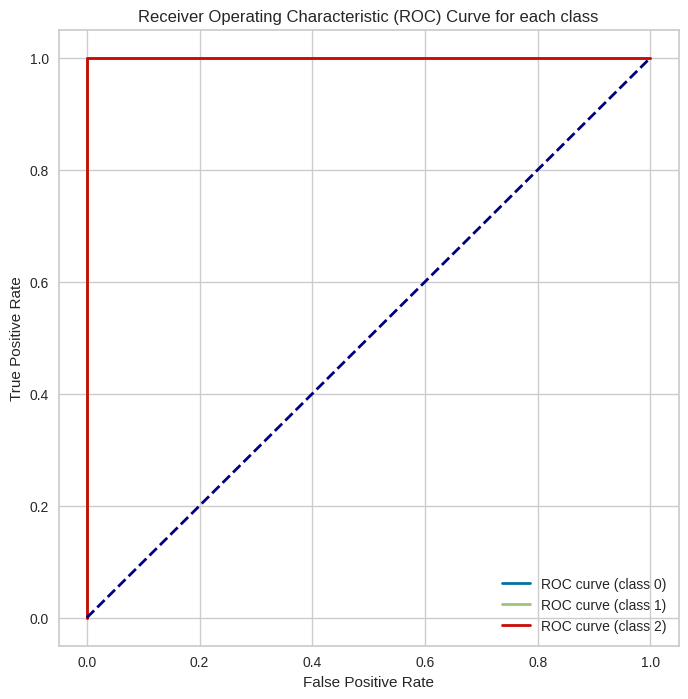

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

def plot_ROC_multiclass(y_true, y_scores, classes):
    # Binarize as classes
    y_true_bin = label_binarize(y_true, classes=classes)

    # Inicialize o classificador OneVsRest
    classifier = OneVsRestClassifier(mod_randForest_cv.best_estimator_)

    # Calcule o ROC para cada classe
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotar as curvas ROC para cada classe
    plt.figure(figsize=(8, 8))
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class {})'.format(classes[i]))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
    plt.legend(loc='lower right')
    plt.show()

    return fpr, tpr, roc_auc

# Suponha que você tenha y_test e y_scores calculados usando seu modelo
y_true = y_test  # Substitua y_test pelos seus rótulos verdadeiros
y_scores = mod_randForest_cv.best_estimator_.predict_proba(x_test)  # Substitua pelo seu modelo e conjunto de teste
classes = np.unique(y_true)

# Chame a função para plotar as curvas ROC para cada classe
fpr, tpr, auc_values = plot_ROC_multiclass(y_true, y_scores, classes)


Feature: 0, Score: 0.10887
Feature: 1, Score: 0.03327
Feature: 2, Score: 0.43613
Feature: 3, Score: 0.42174


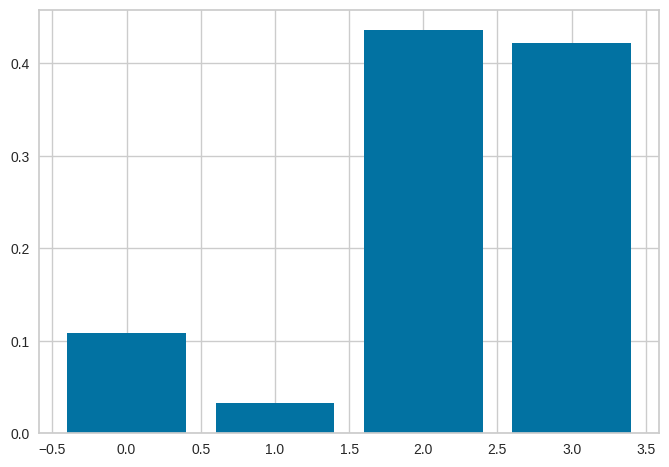

In [ ]:
from matplotlib import pyplot

# get importance
importance = mod_randForest_cv.best_estimator_.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()